# Avacado Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings('ignore')

In [3]:
zf = zipfile.ZipFile('Downloads/avocado.csv.zip')
df = pd.read_csv(zf.open('avocado.csv'))
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [4]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [5]:
#EDA Exploratory Data Analysis

In [6]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (18249, 13)

The column headers in the dataset: Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


In [7]:
#This dataset contains 18249 rows and 13 columns. Out of which the variables AveragePrice and Region are considered as targets for different approaches, the remaining 11 are independent variables described in the above section Project Description.

#Since the dataset can be seen from two angles to find the region(Classification problem) and the average price(Regression Problem) we are going to analyze AveragePrice and Region as target variables during the EDA.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
#There are three types of data (object, int64, and float64 ) present in the dataset.

#Date, type and region columns are objects(strings)
#AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags are float64.
#year column is int64
#The dataset does not present null values.

In [10]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
Date                    0           0.0
AveragePrice            0           0.0
Total Volume            0           0.0
4046                    0           0.0
4225                    0           0.0
4770                    0           0.0
Total Bags              0           0.0
Small Bags              0           0.0
Large Bags              0           0.0
XLarge Bags             0           0.0
type                    0           0.0
year                    0           0.0
region                  0           0.0

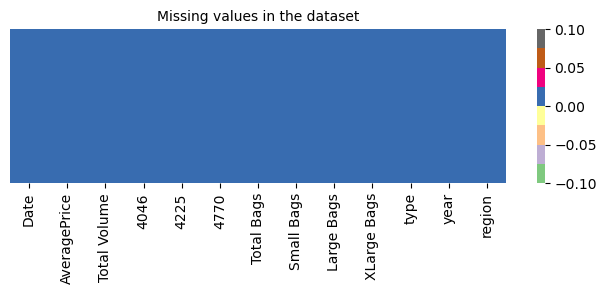

In [11]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

In [12]:
#The dataset does not contain null values. Now we can go on with the EDA.

In [13]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

No. of unique values     type
Date                           169   object
AveragePrice                   259  float64
Total Volume                 18237  float64
4046                         17702  float64
4225                         18103  float64
4770                         12071  float64
Total Bags                   18097  float64
Small Bags                   17321  float64
Large Bags                   15082  float64
XLarge Bags                   5588  float64
type                             2   object
year                             4    int64
region                          54   object

1-AveragePrice is the other target variable with 259 unique values of 18249 total in the dataset. We are facing a regression problem since the target variable is continuous and numerical.
region is the target variable for the classification task and has 54 unique values of 18249 total in the dataset, therefore we can confirm we are facing a classification problem.
2-The type column has 2 unique values and it is a categorical feature.
3-The year column, despite being numerical, is a discrete variable that has 4 unique values.
4-The columns AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags are numericla continuous.

In [14]:
# Inspect the unique values of the target variable
column = 'region'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")
print(f"# unique values: {df[column].nunique()}\n")


Feature region:
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago     

In [15]:
# Inspect the unique values of the target variable
column = 'AveragePrice'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")
print(f"# unique values: {df[column].nunique()}\n")

Feature AveragePrice:
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64
Unique values: [0.44, 0.46, 0.48, 0.49, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79

In [16]:
# Firs we are going to Inspect the values present in type and year column 
categorical_col = ['type', 'year']
for column in categorical_col:
    print(f"Feature {column}:\n{df[column].value_counts()}")
    print(f"Unique values: {sorted(df[column].unique())}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature type:
conventional    9126
organic         9123
Name: type, dtype: int64
Unique values: ['conventional', 'organic']
# unique values: 2

Feature year:
2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64
Unique values: [2015, 2016, 2017, 2018]
# unique values: 4



In [17]:
# Inspect the values present in each column 
for column in df.columns:
    if (column not in ['type', 'year', 'region', 'AveragePrice']):
        print(f"Feature {column}:")
        print(f"# unique values: {df[column].nunique()}\n")
        print(f"Feature {column}:\n{df[column].value_counts()}")

Feature Date:
# unique values: 169

Feature Date:
2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64
Feature Total Volume:
# unique values: 18237

Feature Total Volume:
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64
Feature 4046:
# unique values: 17702

Feature 4046:
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64
Feature 4225:
# unique values: 18103

Feature 4225:
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
2

In [18]:
# Summary statistics of numerical columns
stats = df.describe()
stats

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

In [19]:
df.describe(exclude=[np.number])

Date          type  region
count        18249         18249   18249
unique         169             2      54
top     2015-12-27  conventional  Albany
freq           108          9126     338

In [20]:
#Observations

#The summary of the dataset looks perfect since there are no negative/invalid values present.
#The counts of all the columns are the same which means there are no missing values in the dataset

In [21]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

Total Volume    743267.253009
4046            284363.124531
4225            266093.548356
Total Bags      199895.372060
Small Bags      155831.866696
Large Bags       51690.378145
4770             22654.745993
XLarge Bags       3106.426507
year                 0.147899
AveragePrice         0.035978
dtype: float64

In [22]:
#The mean value is larger than the median(50%) in all features. Therefore, the data is skewed to the right.

In [23]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

Total Volume    5.474791e+07
4046            1.992063e+07
4225            1.776718e+07
Total Bags      1.716101e+07
Small Bags      1.171004e+07
Large Bags      5.176827e+06
4770            2.308671e+06
XLarge Bags     5.132014e+05
AveragePrice    1.038668e+00
year           -2.777545e-02
dtype: float64

In [24]:
#Since the max value is greater than two standard deviations plus the mean in the features listed above, there could be outliers in the data. The feature year would be treated as categorical and has no outliers.

In [25]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 13)

In [26]:
#There are no duplicate values in the dataset.

In [27]:
# convert the Date column into date
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month

In [28]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
month                    int64
dtype: object

In [29]:
df.tail()

Date  AveragePrice  Total Volume     4046     4225    4770  \
18244 2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    13498.67    13066.82      431.85          0.0  organic  2018   
18245     9264.84     8940.04      324.80          0.0  organic  2018   
18246     9394.11     9351.80       42.31          0.0  organic  2018   
18247    10969.54    10919.54       50.00          0.0  organic  2018   
18248    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  month  
18244  WestTexNewMexico      2  
18245  WestTexNewMexico      1  
18246  WestTexNewMexico      1  
18247  WestTexNewMexico      1  
18248  WestTexNewMexico      1

In [30]:
#Now the Date column is datetime, and the month column contains the corresponding value.

In [31]:
#Univariate Analysis

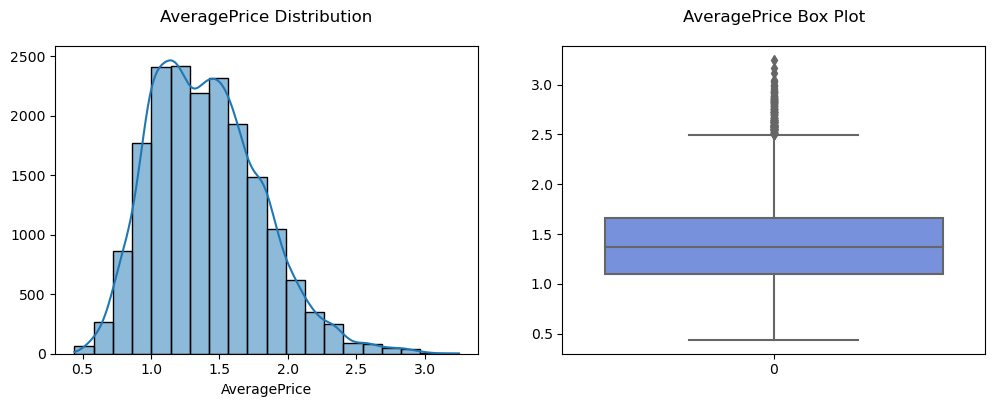

Skewness of AveragePrice : 0.5803027378878419


In [32]:
#Visualize target distribution
col = 'AveragePrice'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

In [33]:
#The distribution of AveragePrices is skewed to the right. There are outliers present in the Box plot.

In [34]:
#Region Feature

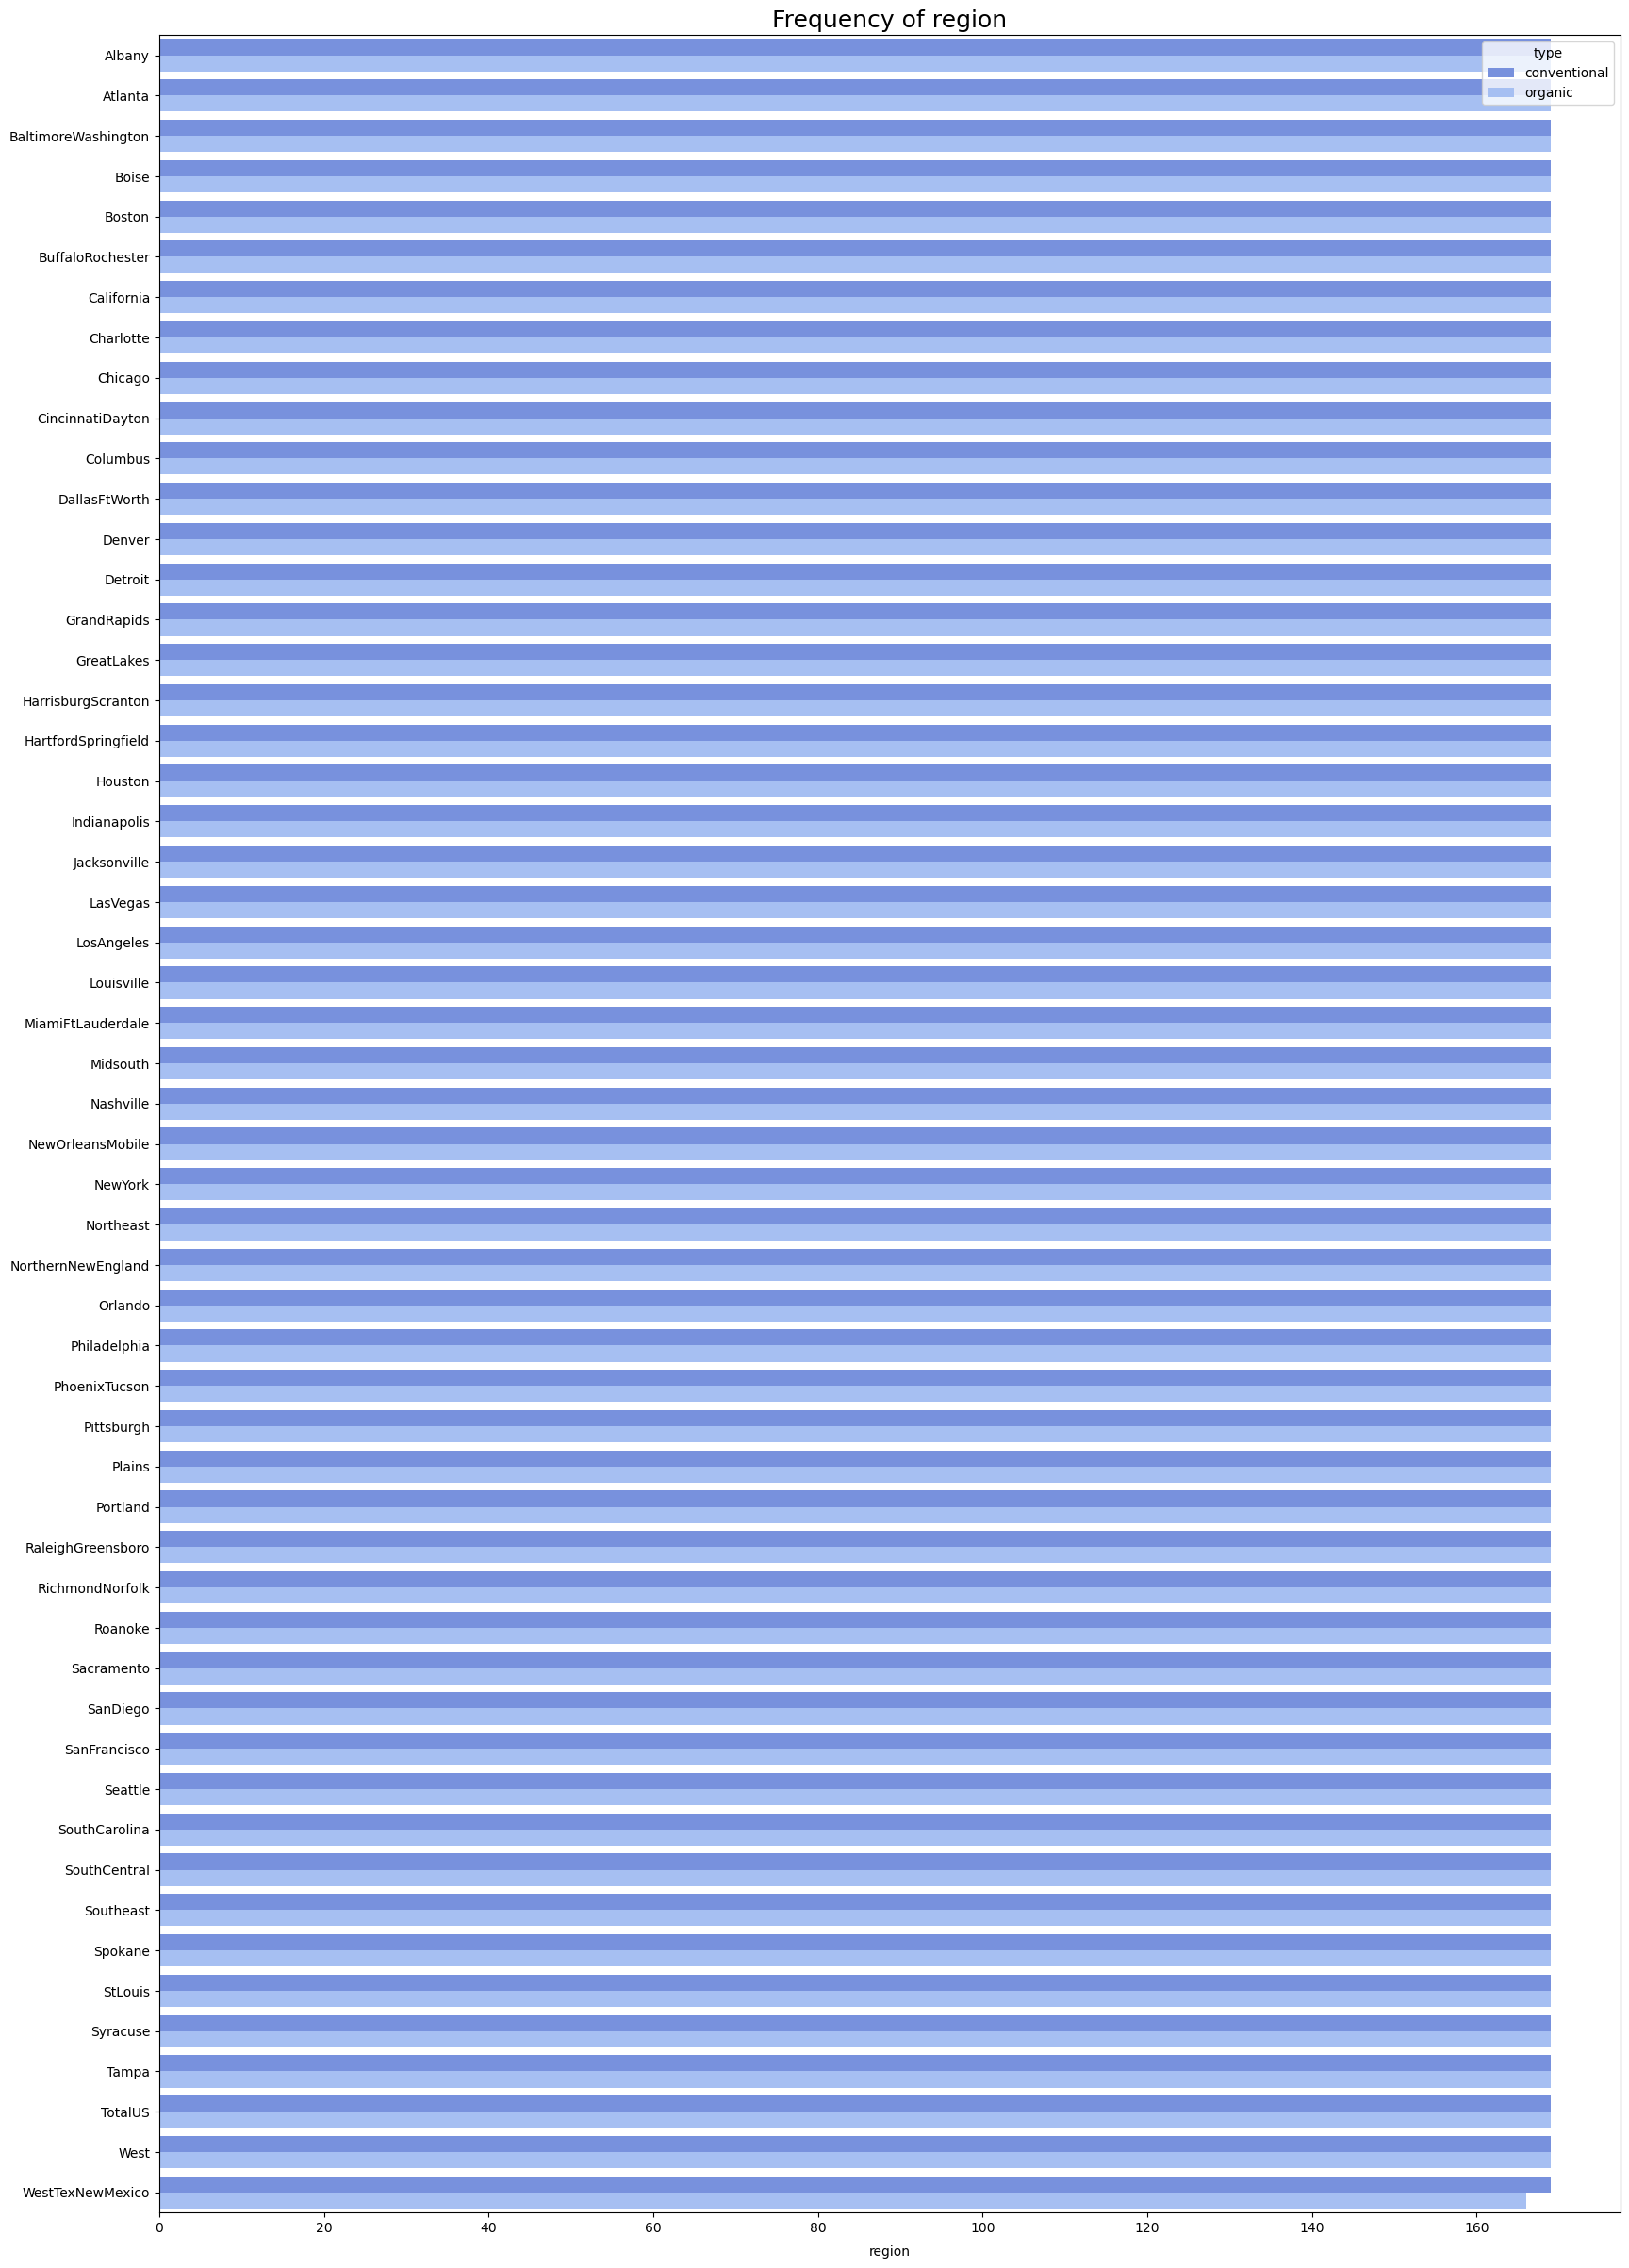

In [35]:
# Set the custom palette
sns.set_palette('coolwarm')

col = 'region'
# Visualize the frequency of Attrition
plt.figure(figsize=(20, 30))
ax = sns.countplot(y=col, hue='type', data=df)

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=18, y=1);

In [36]:
#The feature "region" is balanced.

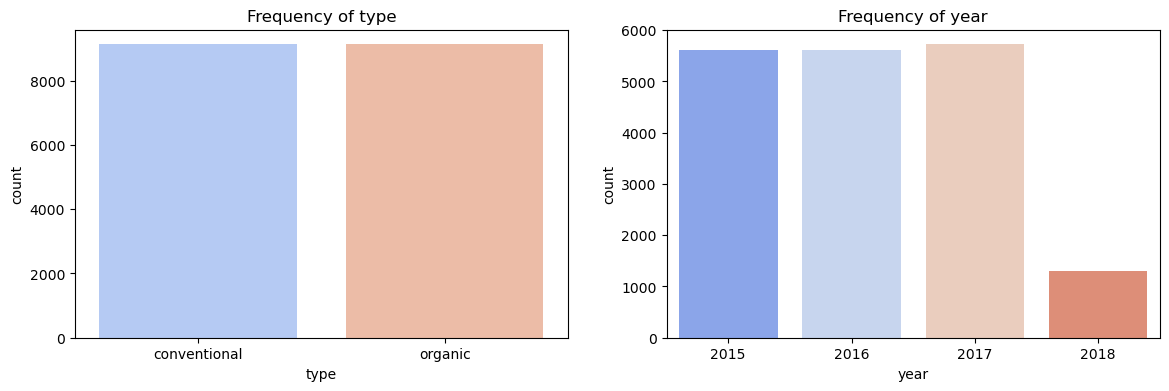

In [37]:
categorical_col = ['type', 'year']

# Visualize the categorical variables
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

for ax, column in zip(axs.flat, categorical_col):
    sns.countplot(data=df, x=column, ax=ax, palette='coolwarm')
    ax.set_title(f"Frequency of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [38]:
#The data is balanced referencing the "type" feature.
#The data referenced to the 'year' feature is balanced except for the year 2018 which has fewer records.

In [39]:
numerical_col = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [40]:
# List of numerical columns in the dataset
for i,col in enumerate(numerical_col[1:]):
    print(f"{i+1}. {col}")

1. Total Volume
2. 4046
3. 4225
4. 4770
5. Total Bags
6. Small Bags
7. Large Bags
8. XLarge Bags


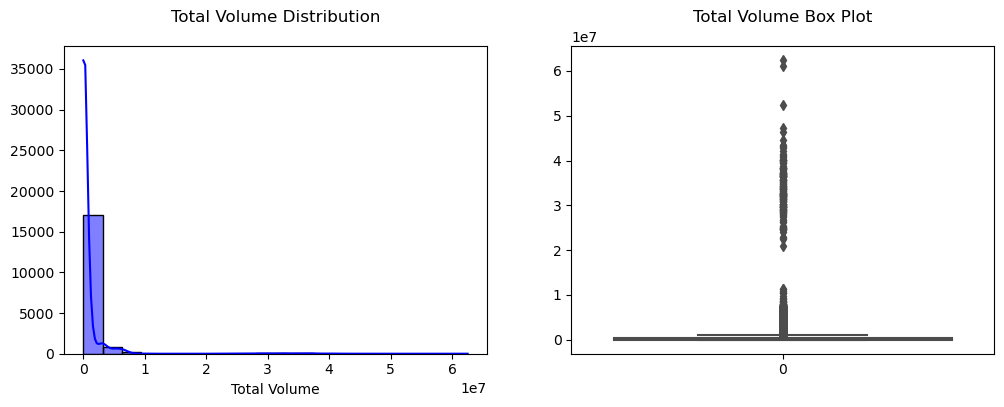

Skewness of Total Volume : 9.00768747885452


In [41]:
#Visualize (1)Total Volume distribution
col = 'Total Volume'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total Volume
print(f"Skewness of {col} : {df[col].skew()}")

In [42]:
#The distribution of 'Total Volume' is skewed to the right. There are outliers present in the Box plot.

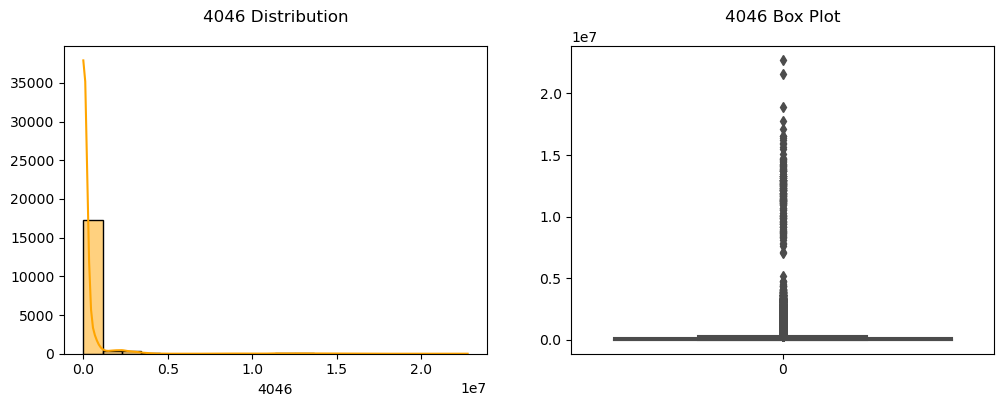

Skewness of 4046 : 8.648219757025226


In [43]:
#Visualize (2)4046 distribution
col = '4046'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of 4046
print(f"Skewness of {col} : {df[col].skew()}")

In [44]:
#The distribution of '4046' is skewed to the right. There are outliers present in the Box plot.

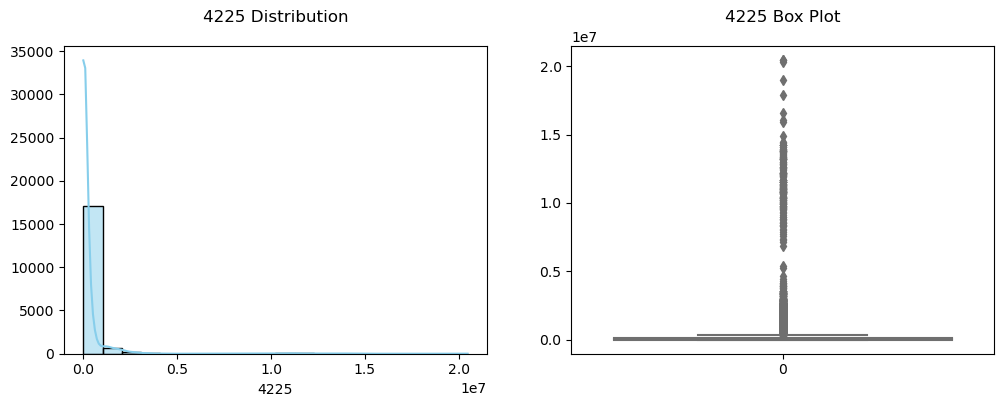

Skewness of 4225 : 8.942465607536276


In [45]:
#Visualize (3)4225 distribution
col = '4225'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of 4225
print(f"Skewness of {col} : {df[col].skew()}")

In [46]:
#The distribution of '4225' is skewed to the right. There are outliers present in the Box plot.

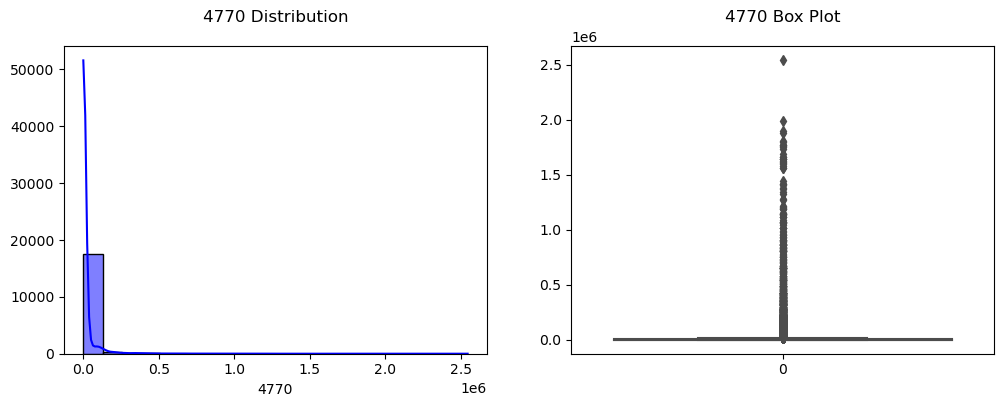

Skewness of 4770 : 10.15939562715204


In [47]:
#Visualize (4)4770 distribution
col = '4770'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of 4770
print(f"Skewness of {col} : {df[col].skew()}")

In [48]:
#The distribution of '4770' is skewed to the right. There are outliers present in the Box plot.

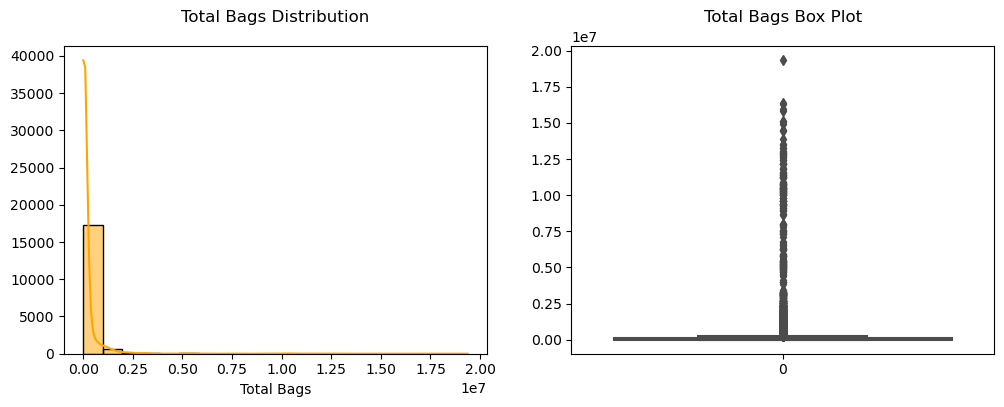

Skewness of Total Bags : 9.756071670300289


In [49]:
#Visualize (5)Total Bags distribution
col = 'Total Bags'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total Bags
print(f"Skewness of {col} : {df[col].skew()}")


In [50]:
The distribution of 'Total Bags' is skewed to the right. There are outliers present in the Box plot.

SyntaxError: invalid syntax (2197865384.py, line 1)

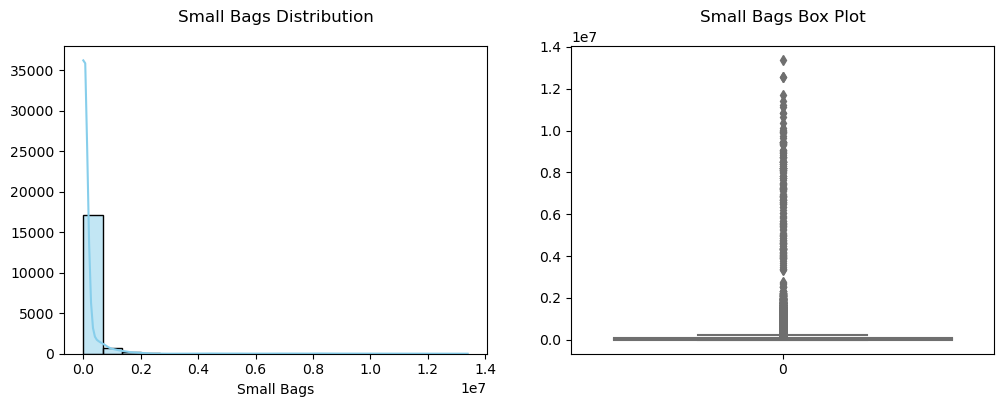

Skewness of Small Bags : 9.540659981758614


In [51]:
#Visualize (6)Small Bags distribution
col = 'Small Bags'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Small Bags
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Small Bags' is skewed to the right. There are outliers present in the Box plot.

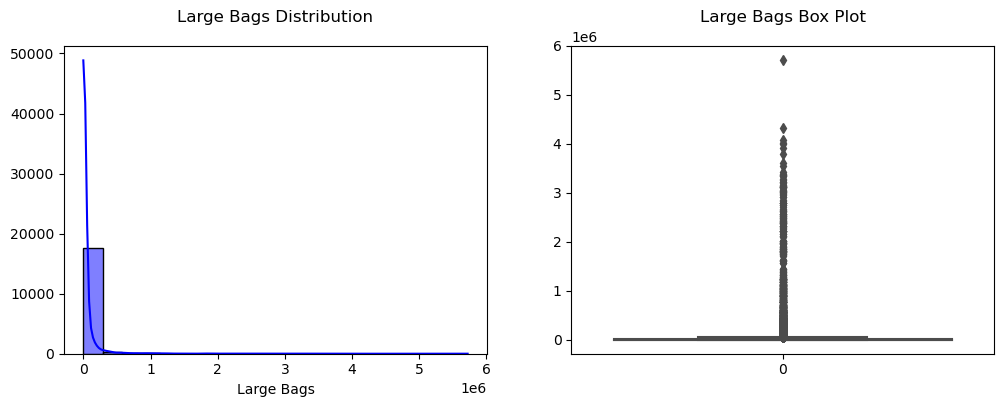

Skewness of Large Bags : 9.796454598705258


In [52]:
#Visualize (7)Large Bags distribution
col = 'Large Bags'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Large Bags
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Large Bags' is skewed to the right. There are outliers present in the Box plot.

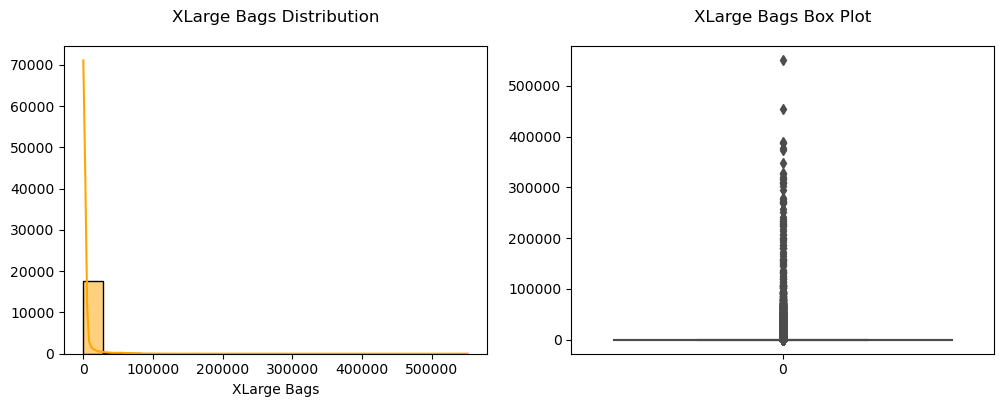

Skewness of XLarge Bags : 13.13975068600658


In [53]:
#Visualize (8)XLarge Bags distribution
col = 'XLarge Bags'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of XLarge Bags
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'XLarge Bags' is skewed to the right. There are outliers present in the Box plot.

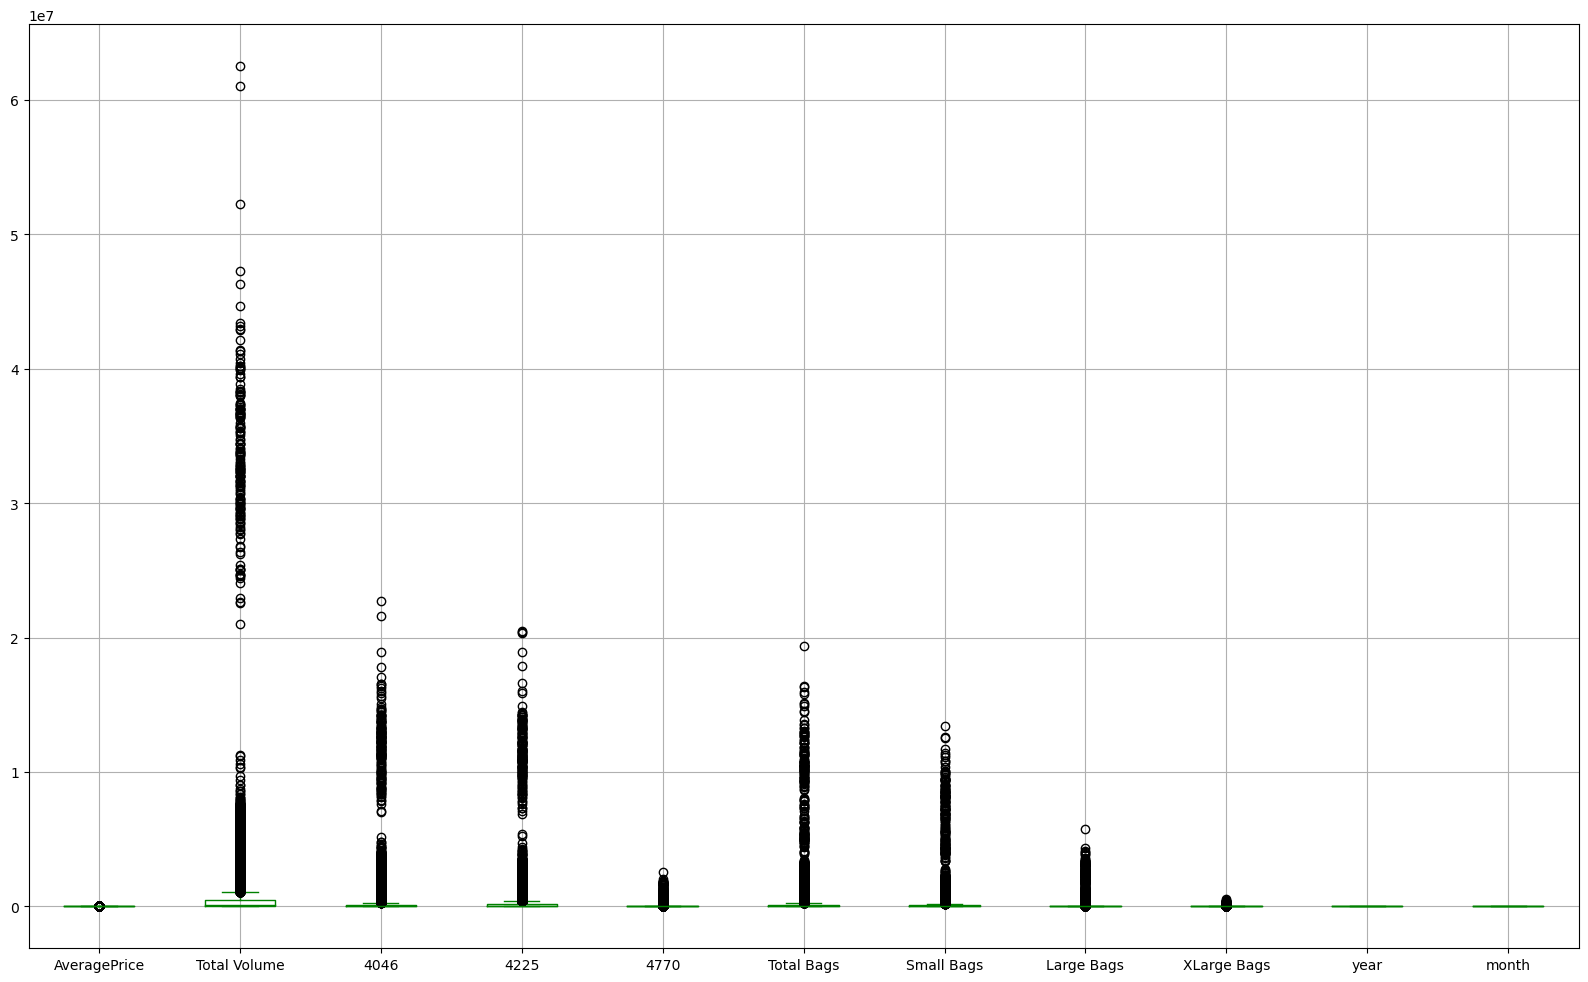

In [54]:
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,12), color='green')
plt.show()

In [55]:
#Bivariate Analysis

In [56]:
price_by_date = df.groupby('Date').mean()['AveragePrice']
price_by_date

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

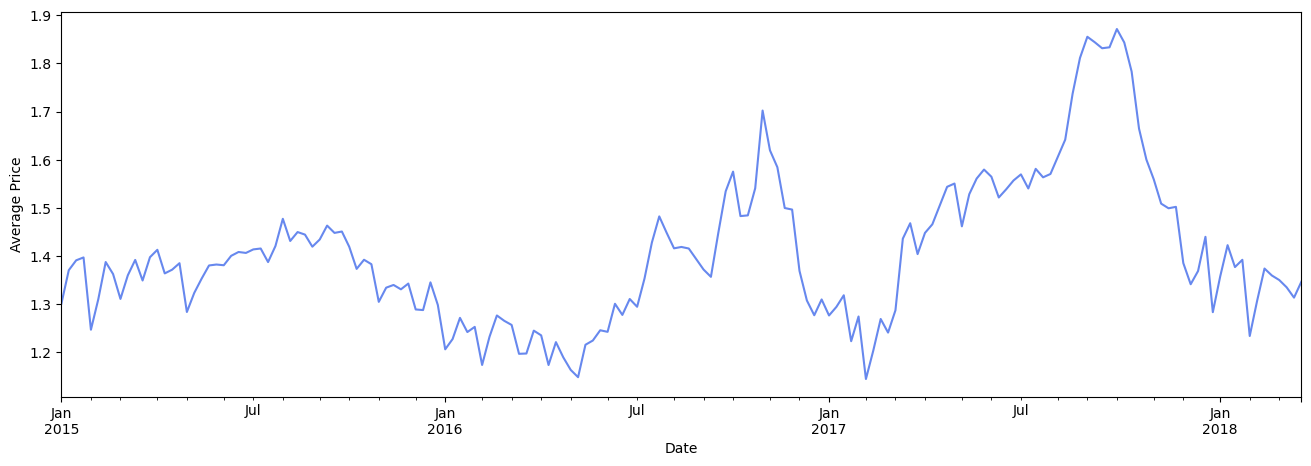

In [57]:
plt.figure(figsize=(16,5))

# Plot the average price over the time
price_by_date.plot()
plt.ylabel('Average Price');

In [58]:
#As we can see the average price tends to increase with peaks in seasons, for example in November 2016 and October 2017, and then tend to decrease aproximadely between 1.3 and 1.4 from January.

In [59]:
# Create a pivot table to compare the average price over time by type of avocado (organic, conventional)
price_by_date_type_t = df.pivot_table(index='Date', columns='type', aggfunc='mean')['AveragePrice']
display(price_by_date_type_t)

type        conventional   organic
Date                              
2015-01-04      1.009630  1.592963
2015-01-11      1.111296  1.630000
2015-01-18      1.133519  1.648704
2015-01-25      1.115370  1.678889
2015-02-01      0.962037  1.532037
...                  ...       ...
2018-02-25      1.141111  1.578148
2018-03-04      1.142407  1.557963
2018-03-11      1.136667  1.533519
2018-03-18      1.096296  1.531111
2018-03-25      1.147222  1.546481

[169 rows x 2 columns]

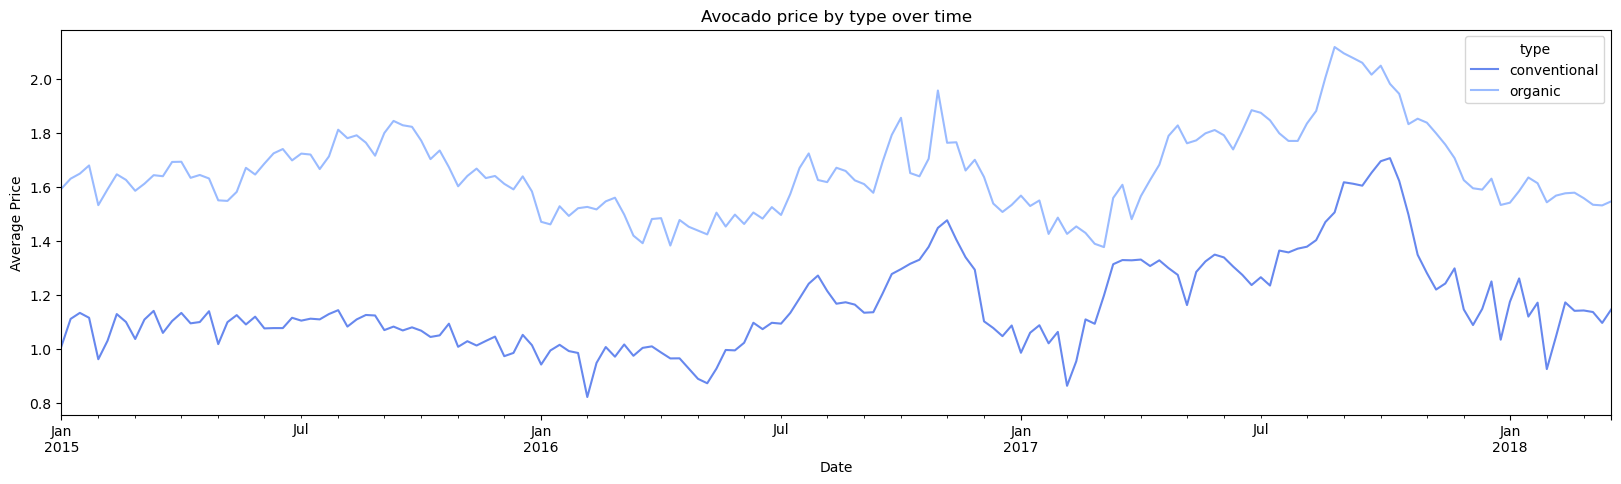

In [60]:
# Plot the Average Price of different types of avocado over time
price_by_date_type_t.plot(figsize=(20,5))
plt.ylabel('Average Price')
plt.title('Avocado price by type over time')
plt.show()

Both types of avocado have a similar behavior with the difference the price of organic avocado is higher.

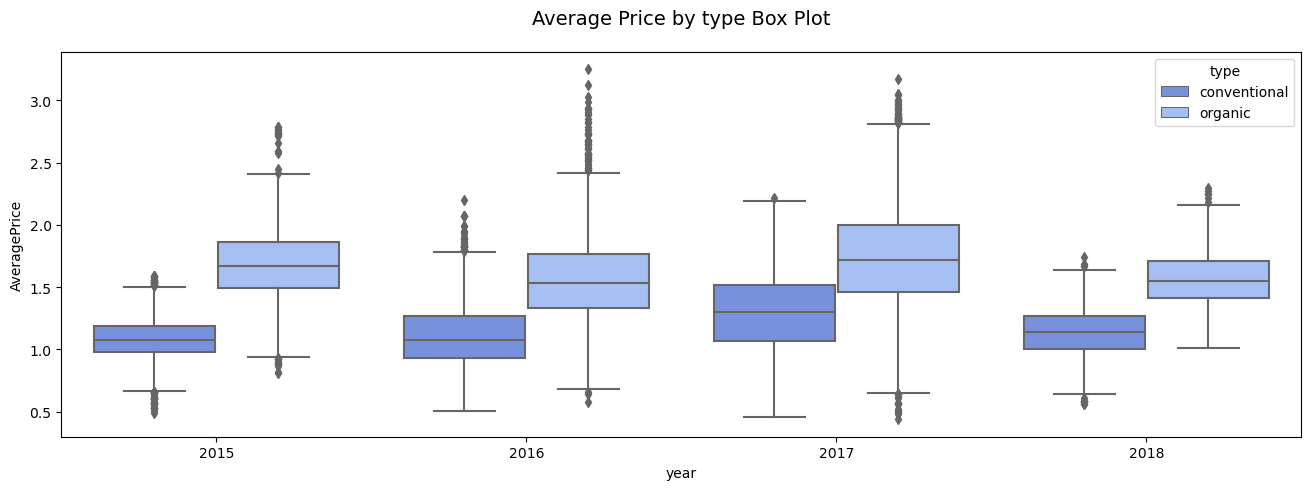

In [61]:
plt.figure(figsize=(16,5))

sns.boxplot(x='year', y='AveragePrice', hue='type', data= df )

plt.title('Average Price by type Box Plot', size=14, y=1.05)
plt.show()

In [62]:
#There are outliers in every year and type. In 2017 the organic type had a better price. In general, the organic type has a better price every year.

In [63]:
df_by_year_type = df.groupby(['year','type'], as_index=False).agg({'AveragePrice':'mean', 
                                                'Total Volume':'sum', 
                                                'Total Bags':'sum', 
                                                'Small Bags': 'sum',
                                                'Large Bags': 'sum',
                                                'XLarge Bags': 'sum'})
df_by_year_type

year          type  AveragePrice  Total Volume    Total Bags    Small Bags  \
0  2015  conventional      1.077963  4.296599e+09  7.481009e+08  6.194886e+08   
1  2015       organic      1.673324  8.886943e+07  2.409134e+07  1.519414e+07   
2  2016  conventional      1.105595  4.690250e+09  1.398101e+09  1.064426e+09   
3  2016       organic      1.571684  1.306401e+08  6.505765e+07  4.206845e+07   
4  2017  conventional      1.294888  4.766166e+09  1.541193e+09  1.145835e+09   
5  2017       organic      1.735521  1.681399e+08  1.050962e+08  7.711715e+07   
6  2018  conventional      1.127886  1.334206e+09  4.593696e+08  3.344334e+08   
7  2018       organic      1.567176  4.853227e+07  3.216630e+07  2.630799e+07   

     Large Bags  XLarge Bags  
0  1.231692e+08   5443128.28  
1  8.897192e+06         0.00  
2  3.136371e+08  20038284.84  
3  2.298920e+07         0.00  
4  3.713655e+08  23991658.41  
5  2.797352e+07      5513.93  
6  1.177311e+08   7205184.07  
7  5.852903e+06      5407.80

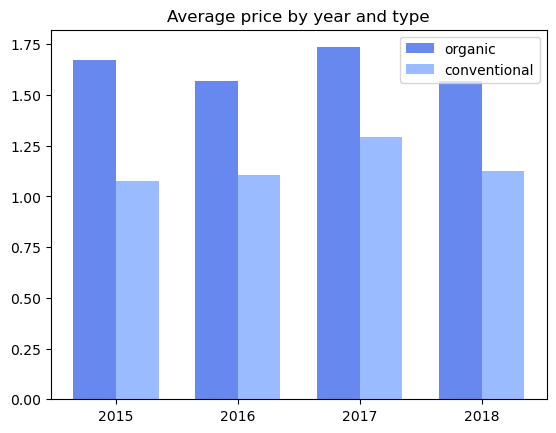

In [64]:
years = df['year'].unique()
n_years = np.arange(df['year'].nunique())
bar_width = 0.35
organic_by_year = df_by_year_type[df_by_year_type['type'] == 'organic']['AveragePrice']
conventional_by_year = df_by_year_type[df_by_year_type['type'] == 'conventional']['AveragePrice']

plt.bar( n_years, organic_by_year , bar_width, label = 'organic')
plt.bar( n_years + bar_width , conventional_by_year, bar_width, label = 'conventional')
plt.xticks( n_years + bar_width/2, years)
plt.title('Average price by year and type')
plt.legend()
plt.show()

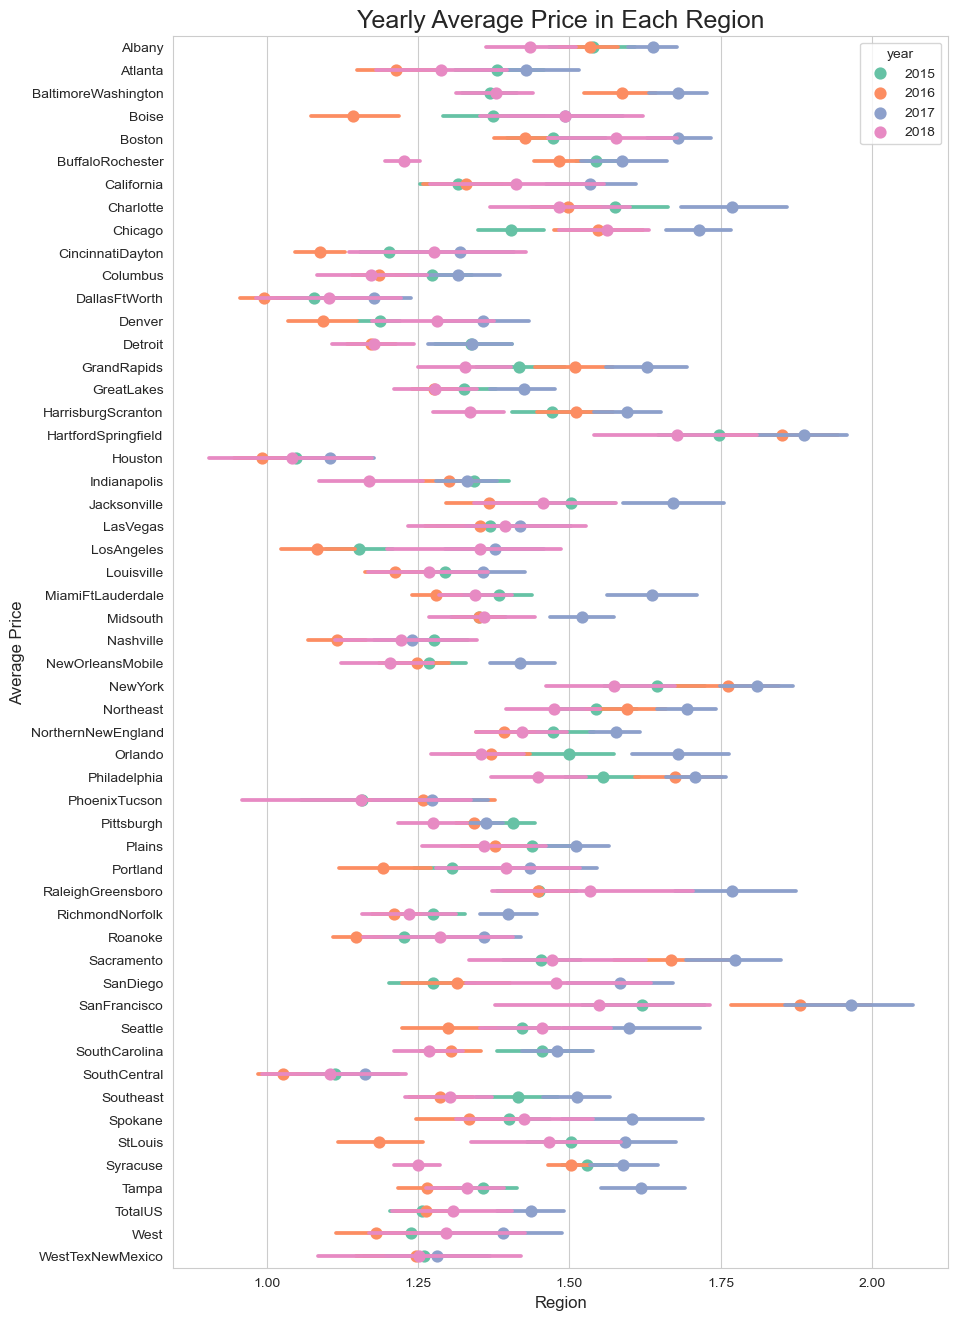

In [65]:
plt.figure(figsize=(10,16))
sns.set_palette('Set2')
sns.set_style('whitegrid')

sns.pointplot(x='AveragePrice', y='region', data=df, hue='year', join=False)

# Set the x axis for average price
plt.xticks(np.linspace(1,2,5))

plt.xlabel('Region', {'fontsize' : 12})
plt.ylabel('Average Price', {'fontsize':12})
plt.title("Yearly Average Price in Each Region", size=18, y=1);

In [66]:
#Here we can see how the average price behaves in each region over time. The better price was for SanFrancisco, followed by HartfordSpringfield in 2017. The worst average price was in 2018 for Houston, followed by PhoenixTucson and SouthCentral region.

#Below we can analyze each type of avocado.

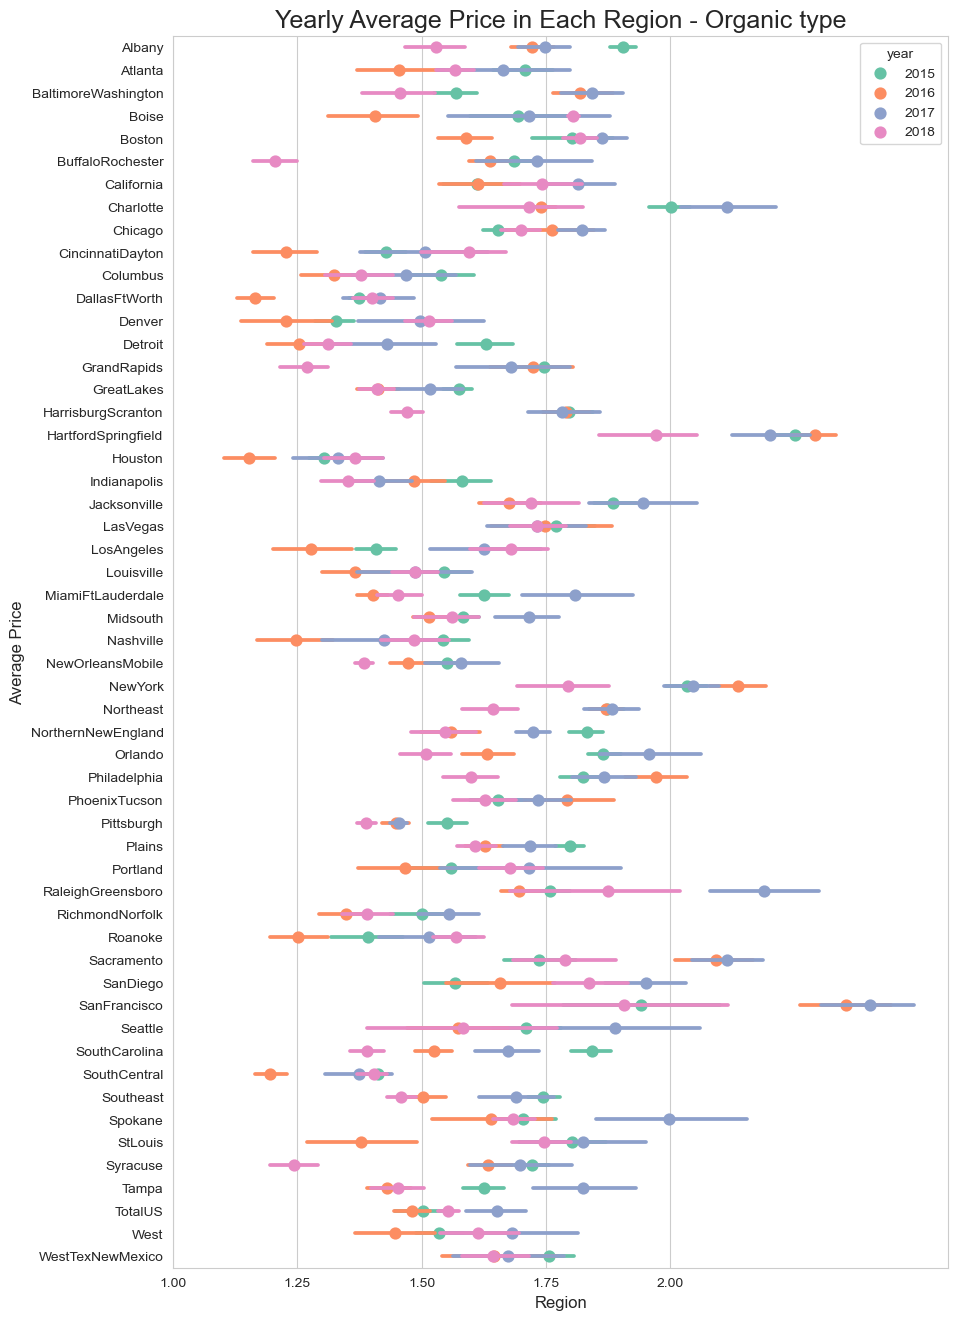

In [67]:
plt.figure(figsize=(10,16))
sns.set_palette('Set2')
sns.set_style('whitegrid')

sns.pointplot(x='AveragePrice', y='region', data=df[df['type']=='organic'], hue='year', join=False)

# Set the x axis for average price
plt.xticks(np.linspace(1,2,5))

plt.xlabel('Region', {'fontsize' : 12})
plt.ylabel('Average Price', {'fontsize':12})
plt.title("Yearly Average Price in Each Region - Organic type", size=18, y=1);

In [68]:
#For the organic type, the best year was 2017 for SanFrancisco, and the worst year was 2016 for Houston.

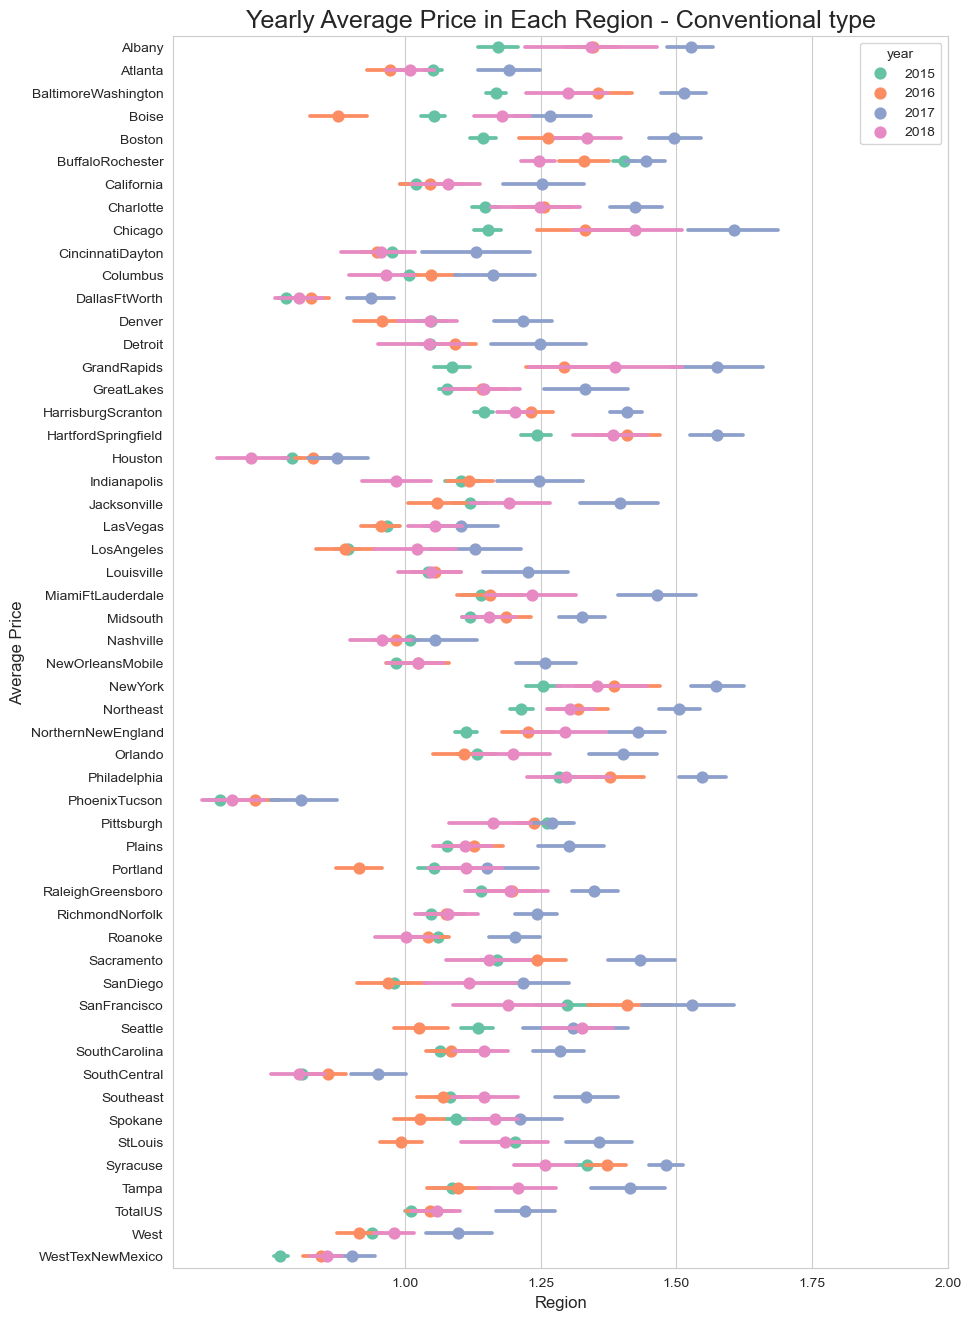

In [69]:
plt.figure(figsize=(10,16))
sns.set_palette('Set2')
sns.set_style('whitegrid')

sns.pointplot(x='AveragePrice', y='region', data=df[df['type']=='conventional'], hue='year', join=False)

# Set the x axis for average price
plt.xticks(np.linspace(1,2,5))

plt.xlabel('Region', {'fontsize' : 12})
plt.ylabel('Average Price', {'fontsize':12})
plt.title("Yearly Average Price in Each Region - Conventional type", size=18, y=1);

In [70]:
#For the conventional type, the best year was 2017 for Chicago, and the worst year was 2015 for PhoenixTucson.

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

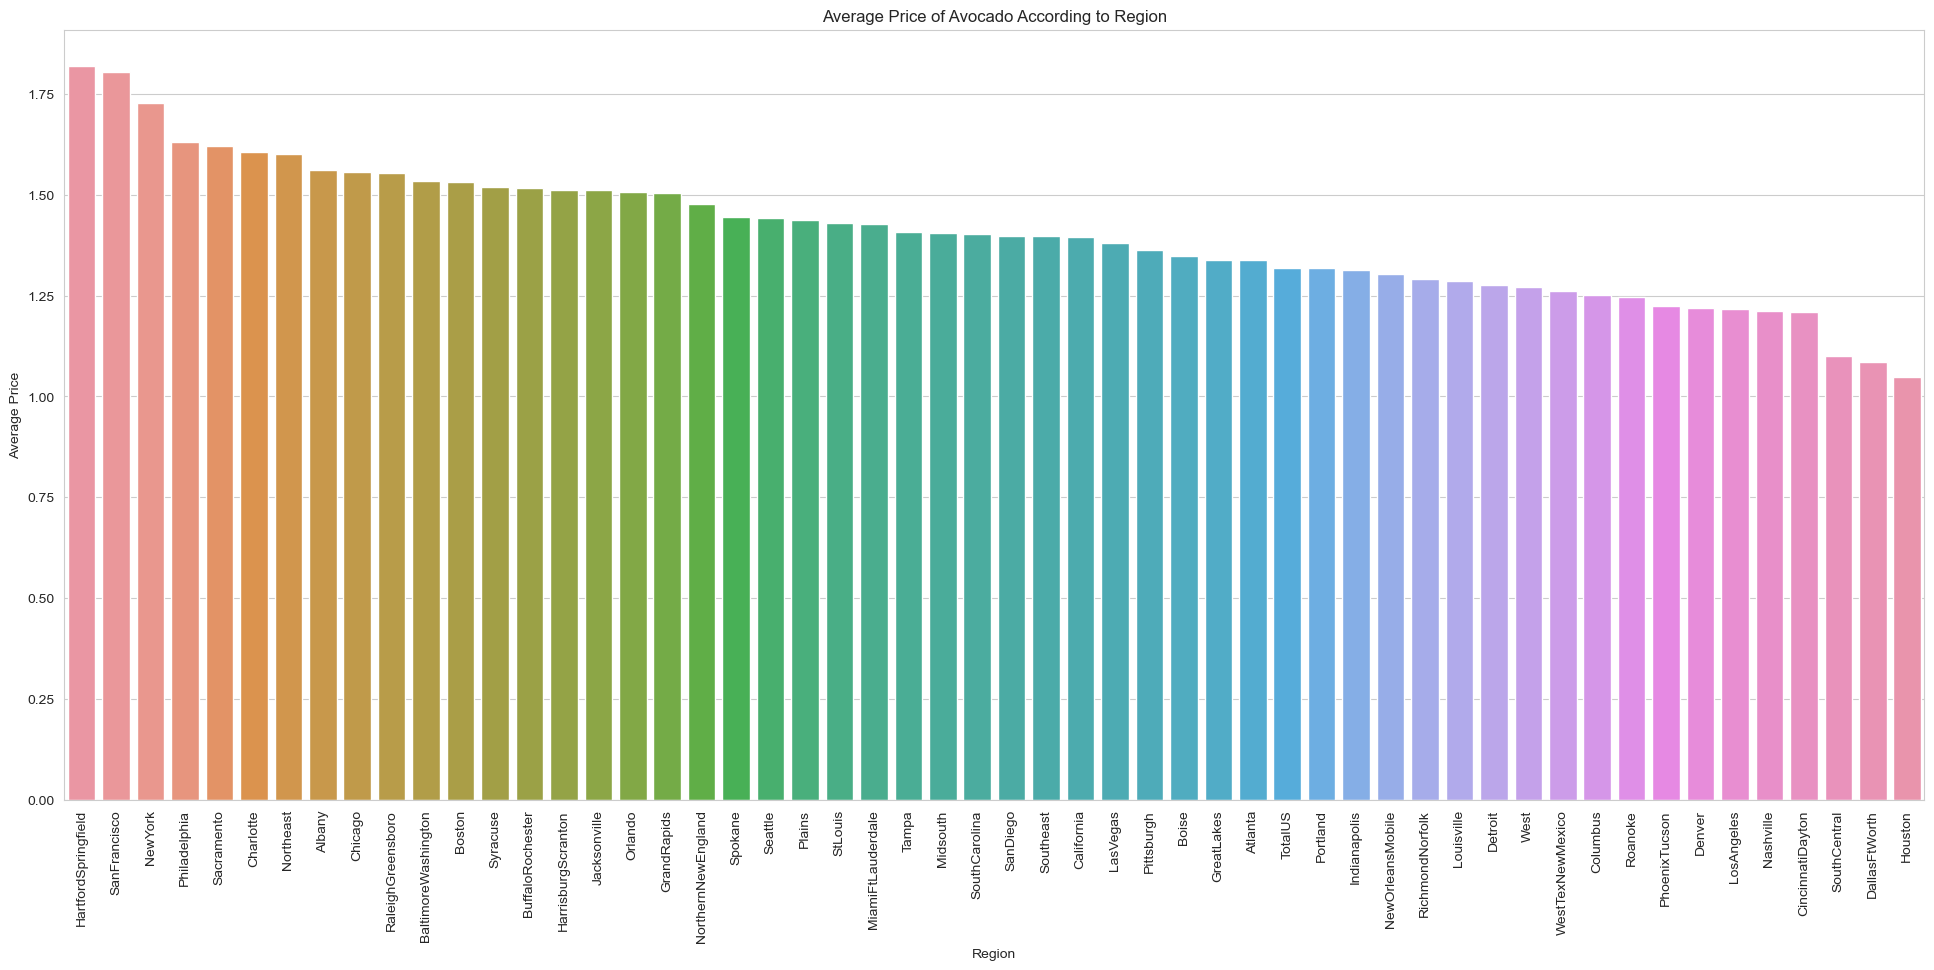

In [71]:
df_temp = df.groupby('region', as_index=False).agg({'AveragePrice': 'mean'})
df_temp = df_temp.sort_values(by='AveragePrice', ascending=False)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=df_temp.region,y=df_temp.AveragePrice)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

In [72]:
df_temp.head(10)

region  AveragePrice
17  HartfordSpringfield      1.818639
42         SanFrancisco      1.804201
28              NewYork      1.727574
32         Philadelphia      1.632130
40           Sacramento      1.621568
7             Charlotte      1.606036
29            Northeast      1.601923
0                Albany      1.561036
8               Chicago      1.556775
37    RaleighGreensboro      1.555118

In [73]:
# Group by region
df_by_region = df.groupby(['region'], as_index=False).agg({'Total Volume':'mean'})

# Drop the total
df_by_region = df_by_region[df_by_region['region']!='TotalUS']

# sort by total volumen 
df_by_region = df_by_region.sort_values('Total Volume', ascending=False)

display(df_by_region.head())
display(df_by_region.tail())

region  Total Volume
52          West  3.215323e+06
6     California  3.044324e+06
45  SouthCentral  2.991952e+06
29     Northeast  2.110299e+06
46     Southeast  1.820232e+06

region  Total Volume
23  Louisville  47624.267456
0       Albany  47537.869734
47     Spokane  46051.110888
3        Boise  42642.567308
49    Syracuse  32374.756450

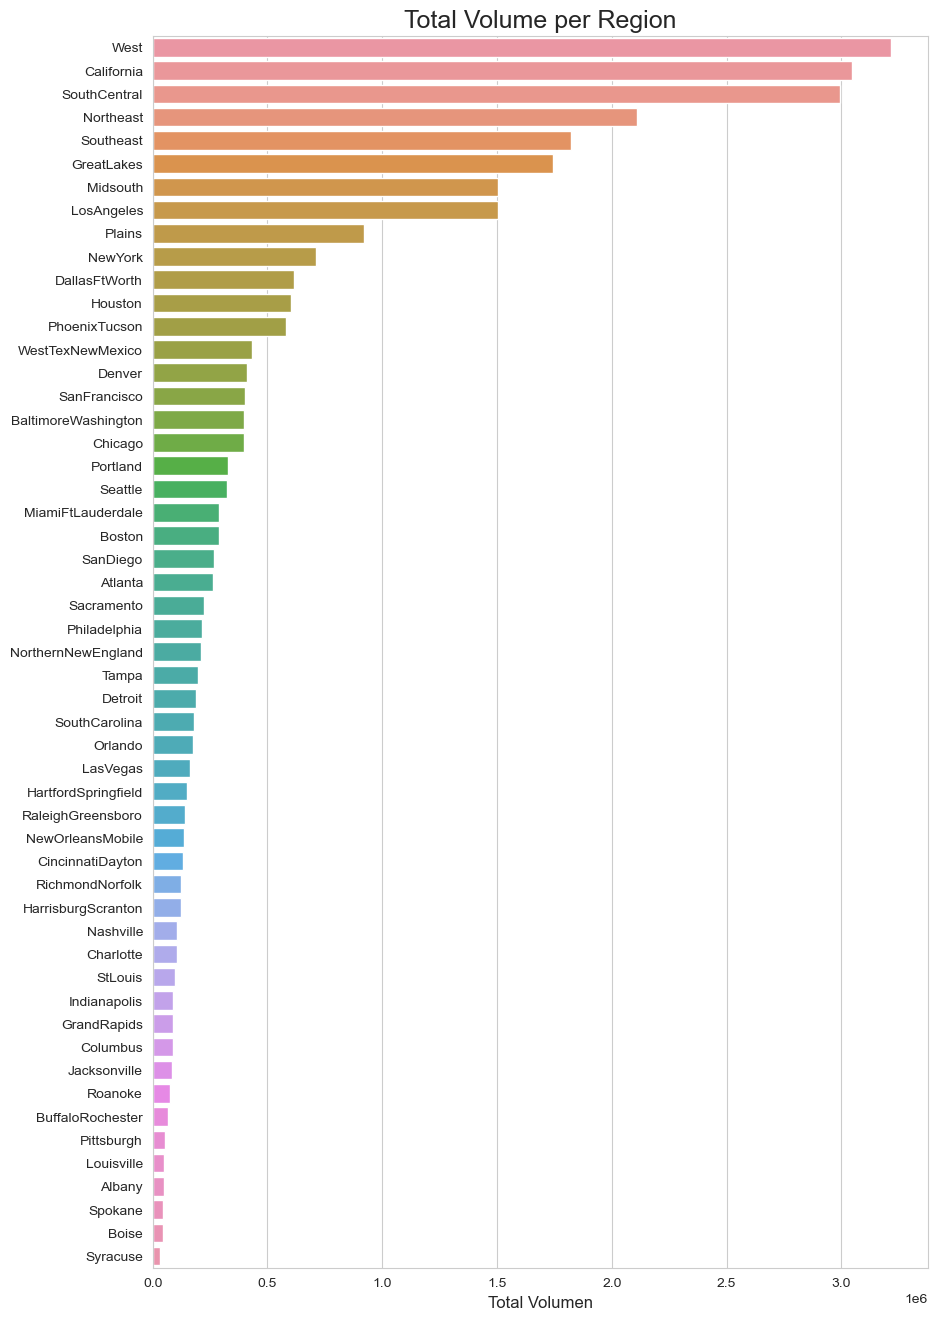

In [74]:
plt.figure(figsize=(10,16))
sns.set_palette('Set2')
sns.set_style('whitegrid')

sns.barplot(y='region', x='Total Volume', data=df_by_region)

plt.xlabel('Total Volumen', {'fontsize' : 12})
plt.ylabel('', {'fontsize':12})
plt.title("Total Volume per Region", size=18, y=1);

In [75]:
#The top 5 regions with more volume sold are West, California, SouthCentral, Northeast, and Southeast. The last 5 regions with fewer sales are Syracuse, Boise, Spokane, Albany, and Louisville.

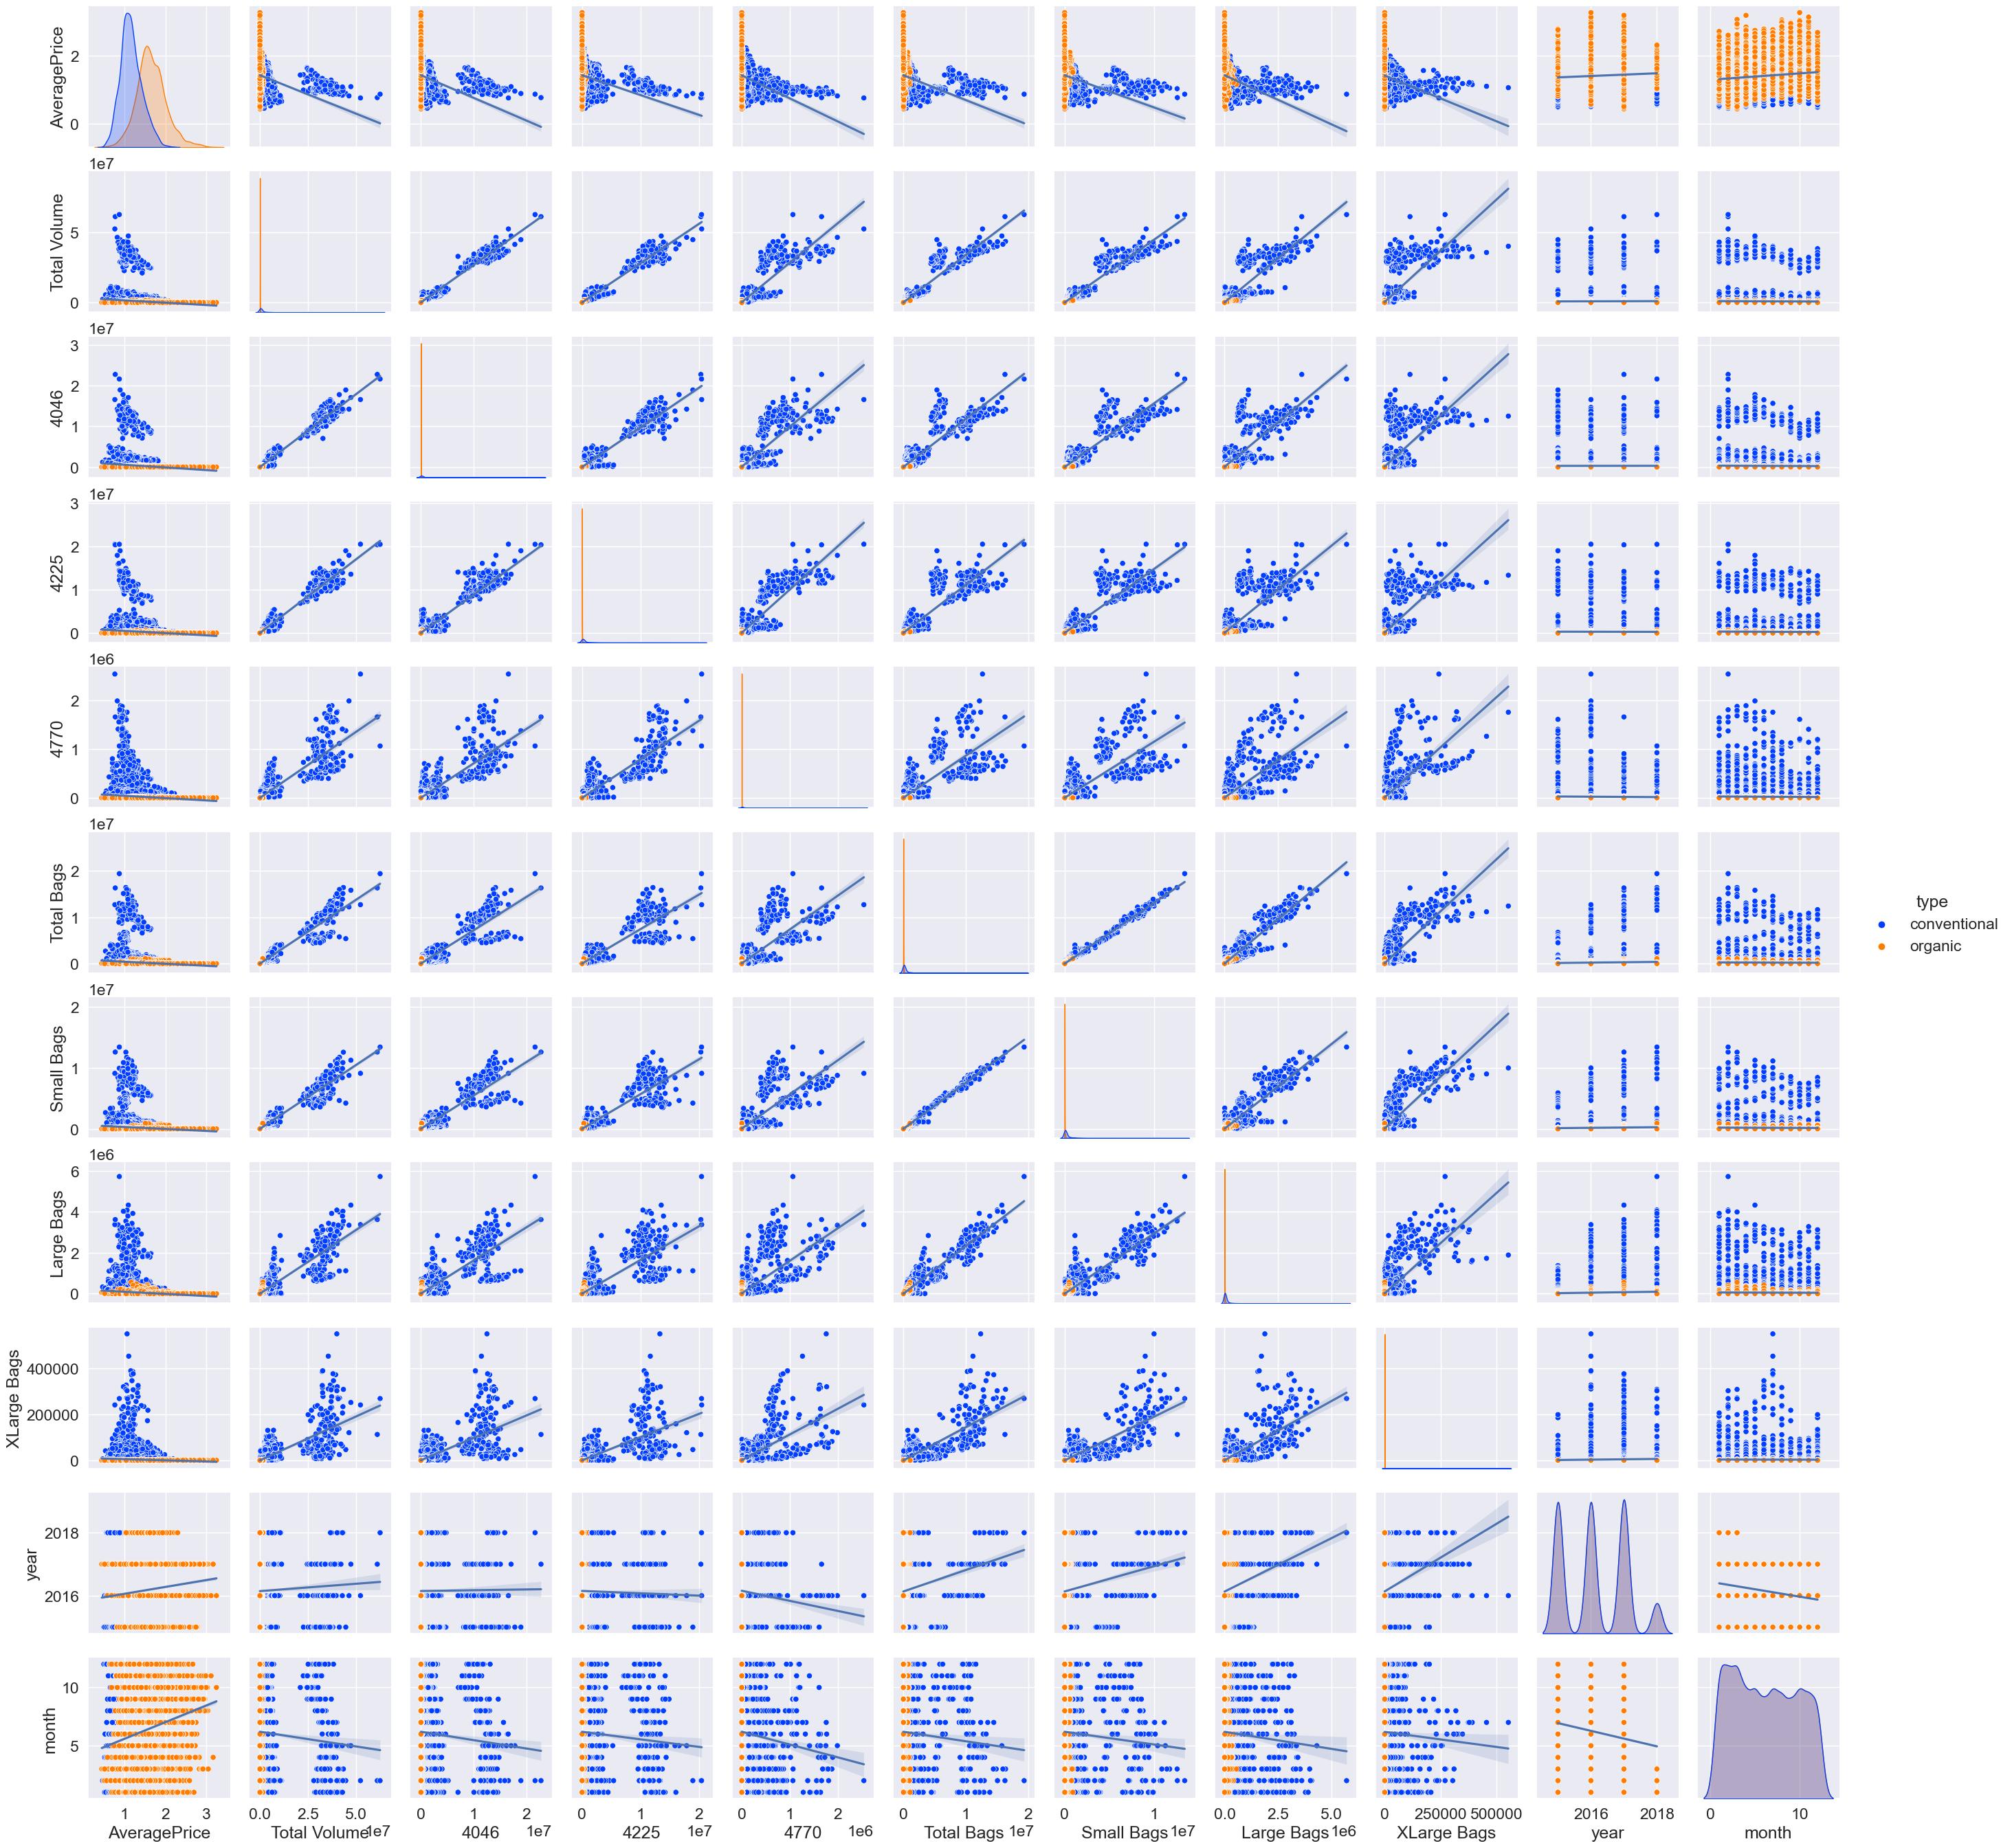

In [77]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, hue='type', palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

In [ ]:
#Since the dataset has so many features this plot does not give detail information. However, we can see that the AveragePrice variable has a weak negative relationship with the majority of independent variables.

#Notwithstanding, there is a positive relationship between Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags.

In [78]:
 #Type encoding
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [79]:
df['type'] = df['type'].map({'conventional': 1, 'organic': 2})
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  month  
0     8696.87     8603.62       93.25          0.0     1  2015  Albany     12  
1     9505.56     9408.07       97.49          0.0     1  2015  Albany     12  
2     8145.35     8042.21      103.14          0.0     1  2015  Albany     12  
3     5811.16     5677.40      133.76          0.0     1  2015  Albany     12  
4     6183.95     5986.26      197.69          0.0     1  2015  Albany     11

In [80]:
# Encoding categorical column region using OrdinalEncoder and 
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
OE = OrdinalEncoder()

# Fit and transform the 'region' column
df['region_enc'] = OE.fit_transform(df['region'].values.reshape(-1, 1))

display(df.head())
display(df.tail())

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  month  \
0     8696.87     8603.62       93.25          0.0     1  2015  Albany     12   
1     9505.56     9408.07       97.49          0.0     1  2015  Albany     12   
2     8145.35     8042.21      103.14          0.0     1  2015  Albany     12   
3     5811.16     5677.40      133.76          0.0     1  2015  Albany     12   
4     6183.95     5986.26      197.69          0.0     1  2015  Albany     11   

   region_enc  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

Date  AveragePrice  Total Volume     4046     4225    4770  \
18244 2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
18244    13498.67    13066.82      431.85          0.0     2  2018   
18245     9264.84     8940.04      324.80          0.0     2  2018   
18246     9394.11     9351.80       42.31          0.0     2  2018   
18247    10969.54    10919.54       50.00          0.0     2  2018   
18248    12014.15    11988.14       26.01          0.0     2  2018   

                 region  month  region_enc  
18244  WestTexNewMexico      2        53.0  
18245  WestTexNewMexico      1        53.0  
18246  WestTexNewMexico      1        53.0  
18247  WestTexNewMexico      1        53.0  
18248  WestTexNewMexico      1        53.0

In [81]:
# Store the category mappings 
category_mappings = {'region': OE.categories_[0].tolist() }

In [82]:
# Calculate the correlation between features
cor = df.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
type              0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
region_enc       -0.011716      0.174176  0.192073  0.145726  0.095252   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.615845   
Total Volume    0.963047    0.967238    0.880640     0.747157 -0.232434   
4046            0.920057    0.925280    0.838645     0.699377 -0.225819   
4225            0.905787    0.916031    0.810015     0.688809 -0.232289   
4770            0.792314    0.802733    0.698471     0.679861 -0.210027   
Total Bags      1.000000    0.994335    0.943009     0.804233 -0.217788   
Small Bags      0.994335    1.000000    0.902589     0.806845 -0.220535   
Large Bags      0.943009    0.902589    1.000000     0.710858 -0.193177   
XLarge Bags     0.804233    0.806845    0.710858     1.000000 -0.175483   
type           -0.217788   -0.220535   -0.193177    -0.175483  1.000000   
year            0.071552    0.063915    0.087891     0.081033 -0.000032   
month          -0.022724   -0.023126   -0.020187    -0.012969 -0.000085   
region_enc      0.175256    0.164702    0.198768     0.082281 -0.000280   

                  year     month  region_enc  
AveragePrice  0.093197  0.162409   -0.011716  
Total Volume  0.017193 -0.024689    0.174176  
4046          0.003353 -0.025803    0.192073  
4225         -0.009559 -0.022108    0.145726  
4770         -0.036531 -0.033424    0.095252  
Total Bags    0.071552 -0.022724    0.175256  
Small Bags    0.063915 -0.023126    0.164702  
Large Bags    0.087891 -0.020187    0.198768  
XLarge Bags   0.081033 -0.012969    0.082281  
type         -0.000032 -0.000085   -0.000280  
year          1.000000 -0.177050   -0.000055  
month        -0.177050  1.000000   -0.000144  
region_enc   -0.000055 -0.000144    1.000000

In [83]:
# Listing the correlation coeficients with the target variable AveragePrice
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'AveragePrice')]

Feature A     Feature B  Corr coef
0    AveragePrice  AveragePrice   1.000000
69   AveragePrice          type   0.615845
82   AveragePrice         month   0.162409
87   AveragePrice          year   0.093197
115  AveragePrice    region_enc  -0.011716
136  AveragePrice   XLarge Bags  -0.117592
138  AveragePrice          4225  -0.172928
140  AveragePrice    Large Bags  -0.172940
142  AveragePrice    Small Bags  -0.174730
148  AveragePrice    Total Bags  -0.177088
150  AveragePrice          4770  -0.179446
151  AveragePrice  Total Volume  -0.192752
155  AveragePrice          4046  -0.208317

In [84]:
#Here is the list of the correlation coefficients with the target variable AveragePrices. As we can see there is a weak positive relation with month and year, and a weak negative relation with the rest independent variables.

In [85]:
# Listing the correlation coeficients with the target variable AveragePrice
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'region_enc')]

Feature A     Feature B  Corr coef
12   region_enc    region_enc   1.000000
71   region_enc    Large Bags   0.198768
73   region_enc          4046   0.192073
75   region_enc    Total Bags   0.175256
77   region_enc  Total Volume   0.174176
79   region_enc    Small Bags   0.164702
84   region_enc          4225   0.145726
85   region_enc          4770   0.095252
92   region_enc   XLarge Bags   0.082281
106  region_enc          year  -0.000055
109  region_enc         month  -0.000144
112  region_enc          type  -0.000280
116  region_enc  AveragePrice  -0.011716

In [86]:
#The region has a weak positive relationship with the independent features, except with year, month, type, and AveragePrice. These last 4 have a weak negative relationship with region.

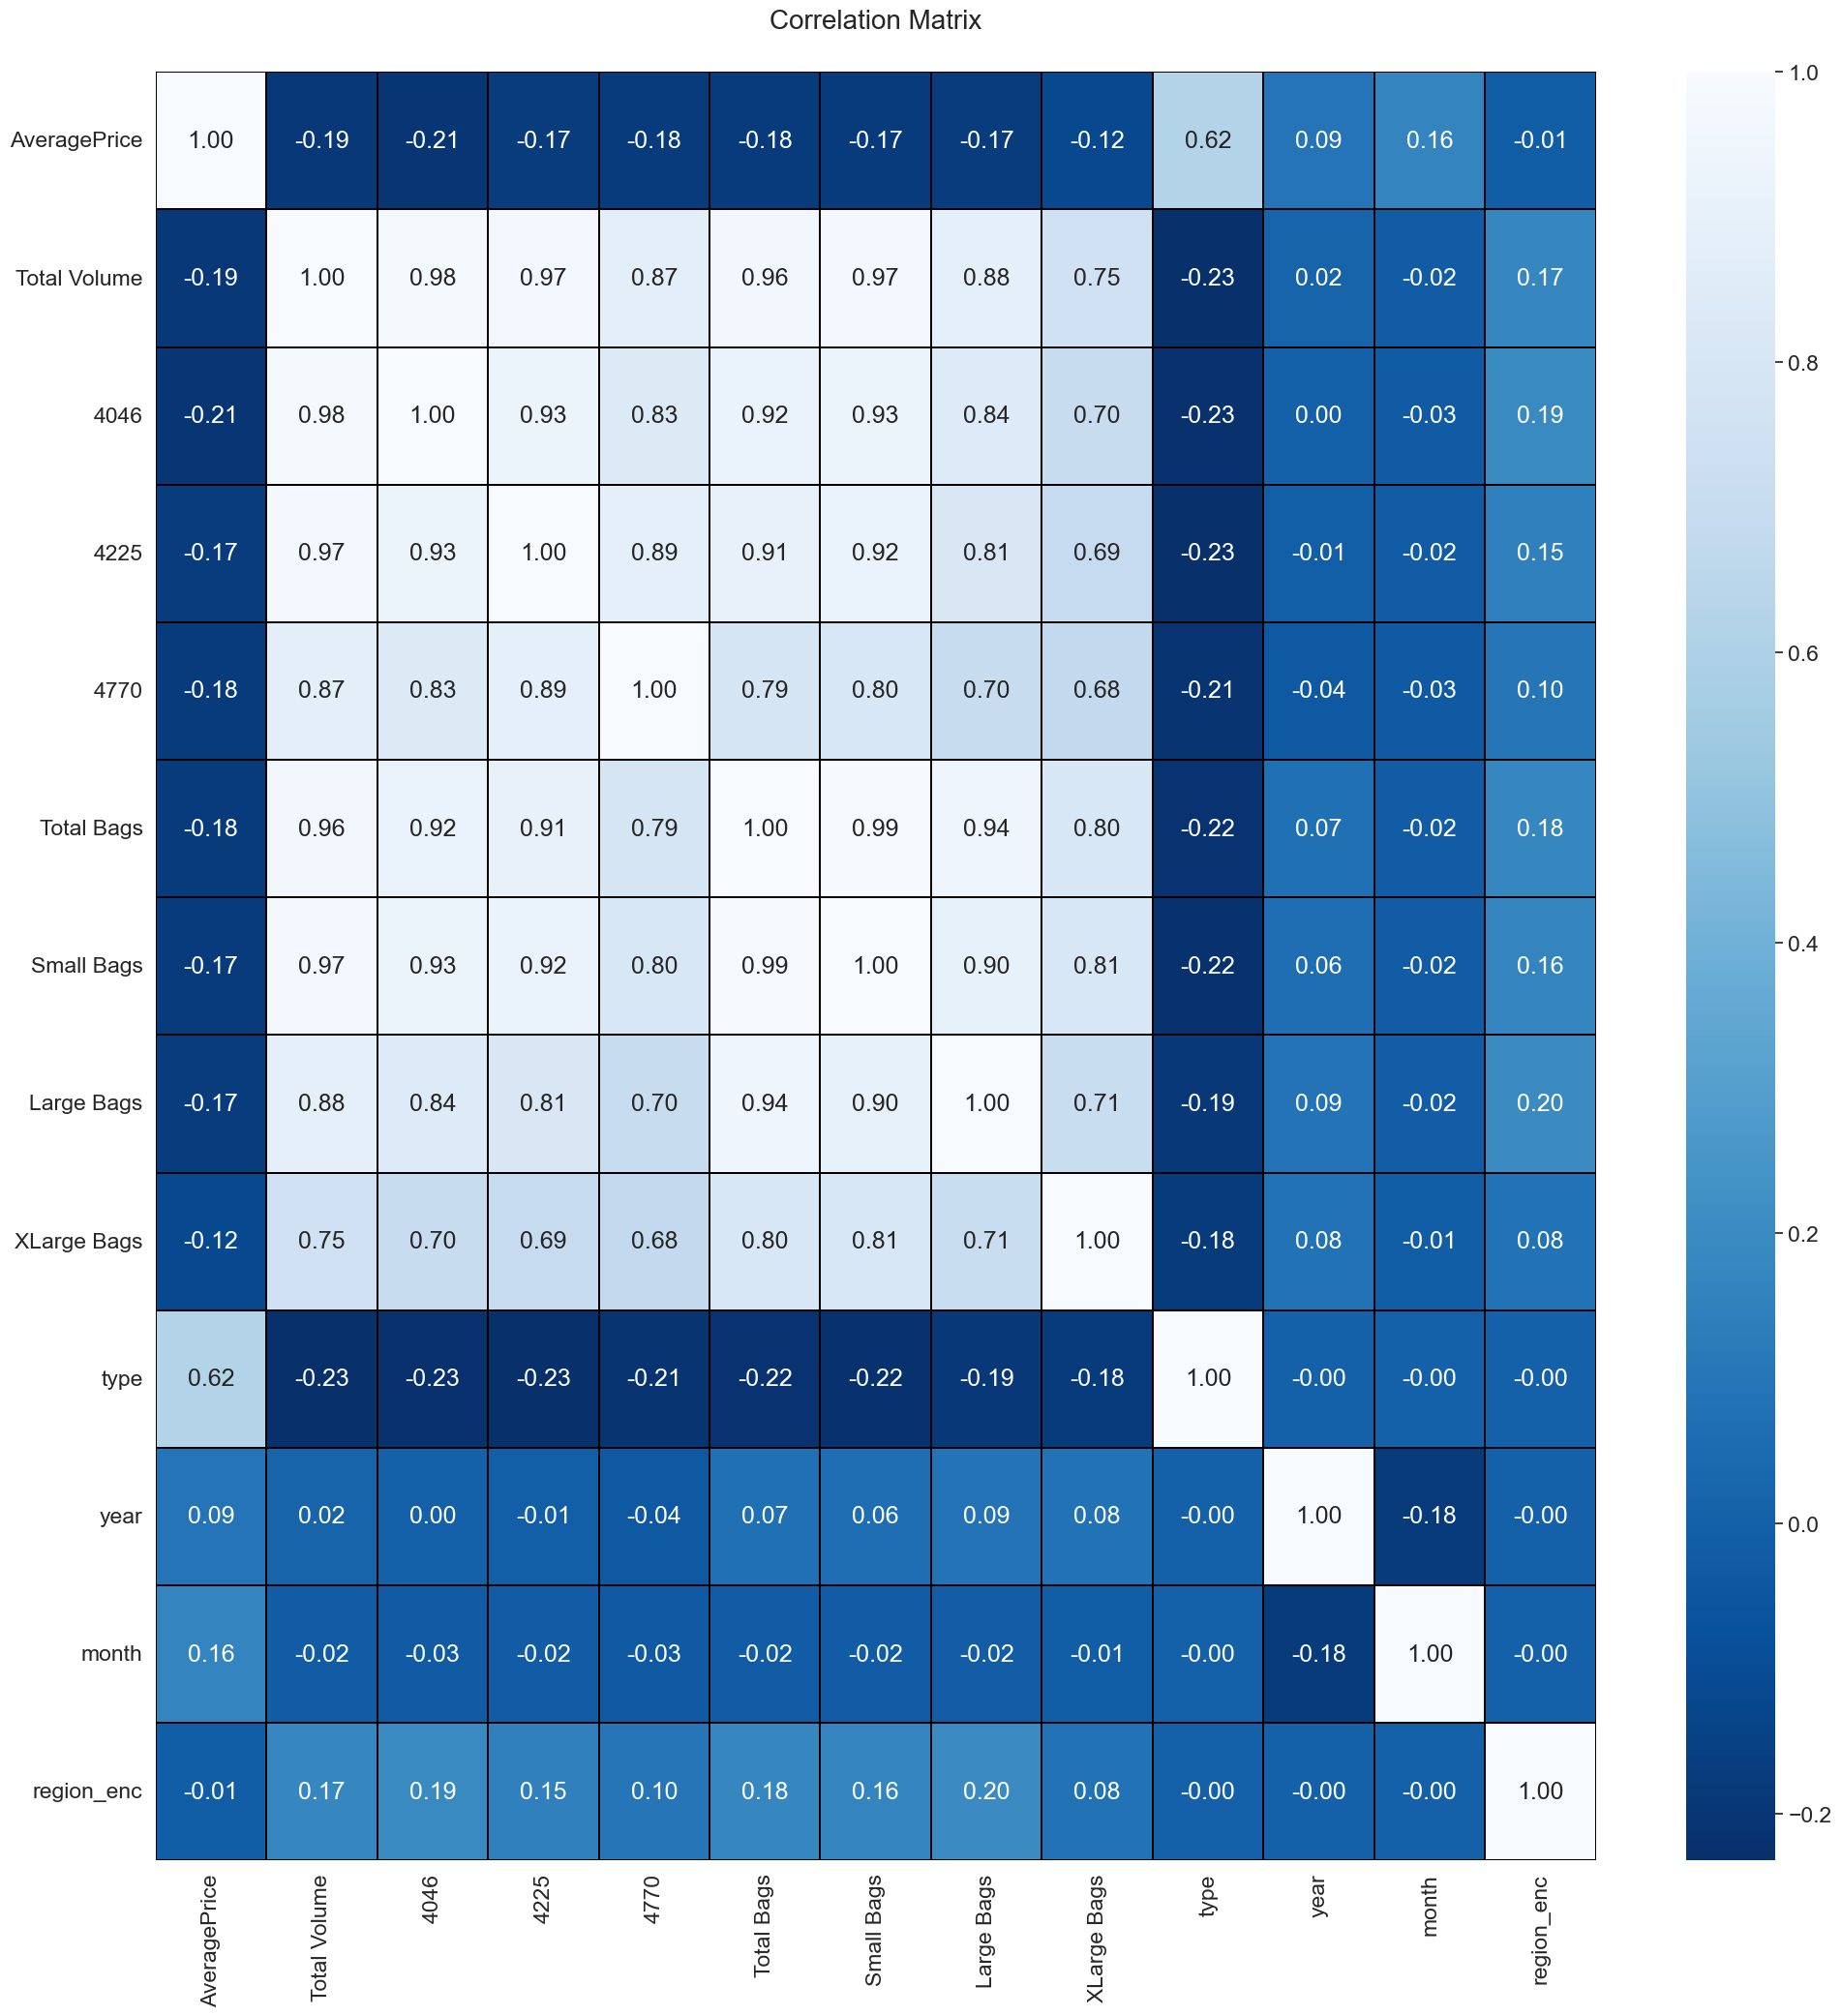

In [87]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

In [88]:
#This heatmap shows the correlation matrix. We can observe the relationship between feature-to-feature and feature-to-label.

#This heatmap contains both positive and negative correlations.
#The AveragePrice feature has more correlation with type(+0.62) and is negatively correlated with 4046 column(-0.21)
#The region feature is slightly correlated with Large Bags(+0.2).
#The columns Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags are highly correlated with each other.

In [89]:
df.isnull().sum().sum()

0

In [90]:
#No missing values to remove.

In [91]:
df_backup = df.copy()

In [92]:
df.drop(['Date','region'], axis=1, inplace=True)
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  month  region_enc  
0     8603.62       93.25          0.0     1  2015     12         0.0  
1     9408.07       97.49          0.0     1  2015     12         0.0  
2     8042.21      103.14          0.0     1  2015     12         0.0  
3     5677.40      133.76          0.0     1  2015     12         0.0  
4     5986.26      197.69          0.0     1  2015     11         0.0

In [93]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags      type      year     month  \
0        0.232647    0.222352      0.17558  0.999836  1.221282  1.647632   
1        0.231568    0.222335      0.17558  0.999836  1.221282  1.647632   
2        0.233399    0.222311      0.17558  0.999836  1.221282  1.647632   
3        0.236568    0.222186      0.17558  0.999836  1.221282  1.647632   
4        0.236154    0.221924      0.17558  0.999836  1.221282  1.364669   
...           ...         ...          ...       ...       ...       ...   
18244    0.226665    0.220964      0.17558  1.000164  1.970504  1.181997   
18245    0.232196    0.221403      0.17558  1.000164  1.970504  1.464959   
18246    0.231644    0.222561      0.17558  1.000164  1.970504  1.464959   
18247    0.229543    0.222529      0.17558  1.000164  1.970504  1.464959   
18248    0.228111    0.222628      0.17558  1.000164  1.970504  1.464959   

       region_enc  
0        1.700252  
1        1.700252  
2        1.700252  
3        1.700252  
4        1.700252  
...           ...  
18244    1.700811  
18245    1.700811  
18246    1.700811  
18247    1.700811  
18248    1.700811  

[18249 rows x 13 columns]

In [94]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()
df

598 rows with outliers were deleted.
This represent 3.28% of the data.
In the new dataset there are 17651 rows and 13 columns.


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  month  region_enc  
0         8603.62       93.25          0.0     1  2015     12         0.0  
1         9408.07       97.49          0.0     1  2015     12         0.0  
2         8042.21      103.14          0.0     1  2015     12         0.0  
3         5677.40      133.76          0.0     1  2015     12         0.0  
4         5986.26      197.69          0.0     1  2015     11         0.0  
...           ...         ...          ...   ...   ...    ...         ...  
18244    13066.82      431.85          0.0     2  2018      2        53.0  
18245     8940.04      324.80          0.0     2  2018      1        53.0  
18246     9351.80       42.31          0.0     2  2018      1        53.0  
18247    10919.54       50.00          0.0     2  2018      1        53.0  
18248    11988.14       26.01          0.0     2  2018      1        53.0  

[17651 rows x 13 columns]

In [95]:
#Skewness Correction

In [96]:
df.columns = ['AveragePrice', 'TotalVolume', '4046', '4225', '4770', 'TotalBags',
              'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year', 'month', 'region']

In [97]:
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
XLargeBags    6.135607
4770          5.117170
LargeBags     5.053434
4046          4.909848
4225          4.455745
SmallBags     4.222706
TotalBags     4.066771
TotalVolume   3.767138
AveragePrice  0.377432
year          0.229976
month         0.107408
region        0.012798
type         -0.037741

In [98]:
# Subsetting the features with a skew > 0.5
skew_columns = df_skew[df_skew['Skew'] > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['4046',
 '4225',
 '4770',
 'LargeBags',
 'SmallBags',
 'TotalBags',
 'TotalVolume',
 'XLargeBags']

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [99]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

In [100]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^([^_]+|.*)')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Check the calculated skeweness for PH-121
display(df_comp[df_comp['feature'] == 'TotalBags'] )

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

index  Skewness    feature  Skewness_abs
8   TotalBags_sqrt  2.010691  TotalBags      2.010691
9    TotalBags_log       NaN  TotalBags           NaN
10  TotalBags_cbrt  1.231831  TotalBags      1.231831
11       TotalBags  4.066771  TotalBags      4.066771

index  Skewness      feature  Skewness_abs
30        4046_cbrt  1.555876         4046      1.555876
26        4225_cbrt  1.277025         4225      1.277025
22        4770_cbrt  1.635614         4770      1.635614
18   LargeBags_cbrt  1.276213    LargeBags      1.276213
14   SmallBags_cbrt  1.246033    SmallBags      1.246033
10   TotalBags_cbrt  1.231831    TotalBags      1.231831
5   TotalVolume_log -0.050092  TotalVolume      0.050092
2   XLargeBags_cbrt  2.277028   XLargeBags      2.277028

For each skewness column, we obtain the better transform method. We can observe that for columns 4046, 4225, 4770, LargeBags, Smallbags, TotalBags, and XLargeBags is better to apply the cube-root transform method. For TotalVolume we will apply the log transform method.



In [101]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['4046', '4225', '4770', 'LargeBags', 'SmallBags', 'TotalBags', 'XLargeBags' ]
print(cbrt_columns)

# Update the df dataset with the transfor data with square root method.
for col in cbrt_columns:
    df[col] = np.cbrt(df[col])

['4046', '4225', '4770', 'LargeBags', 'SmallBags', 'TotalBags', 'XLargeBags']


In [102]:
# Transform the Total Volume column
col='TotalVolume'
df[col] = np.log(df[col])

In [103]:
# This is the new skewness for the transformed columns
df[skew_columns].skew()

4046           1.555876
4225           1.277025
4770           1.635614
LargeBags      1.276213
SmallBags      1.246033
TotalBags      1.231831
TotalVolume   -0.050092
XLargeBags     2.277028
dtype: float64

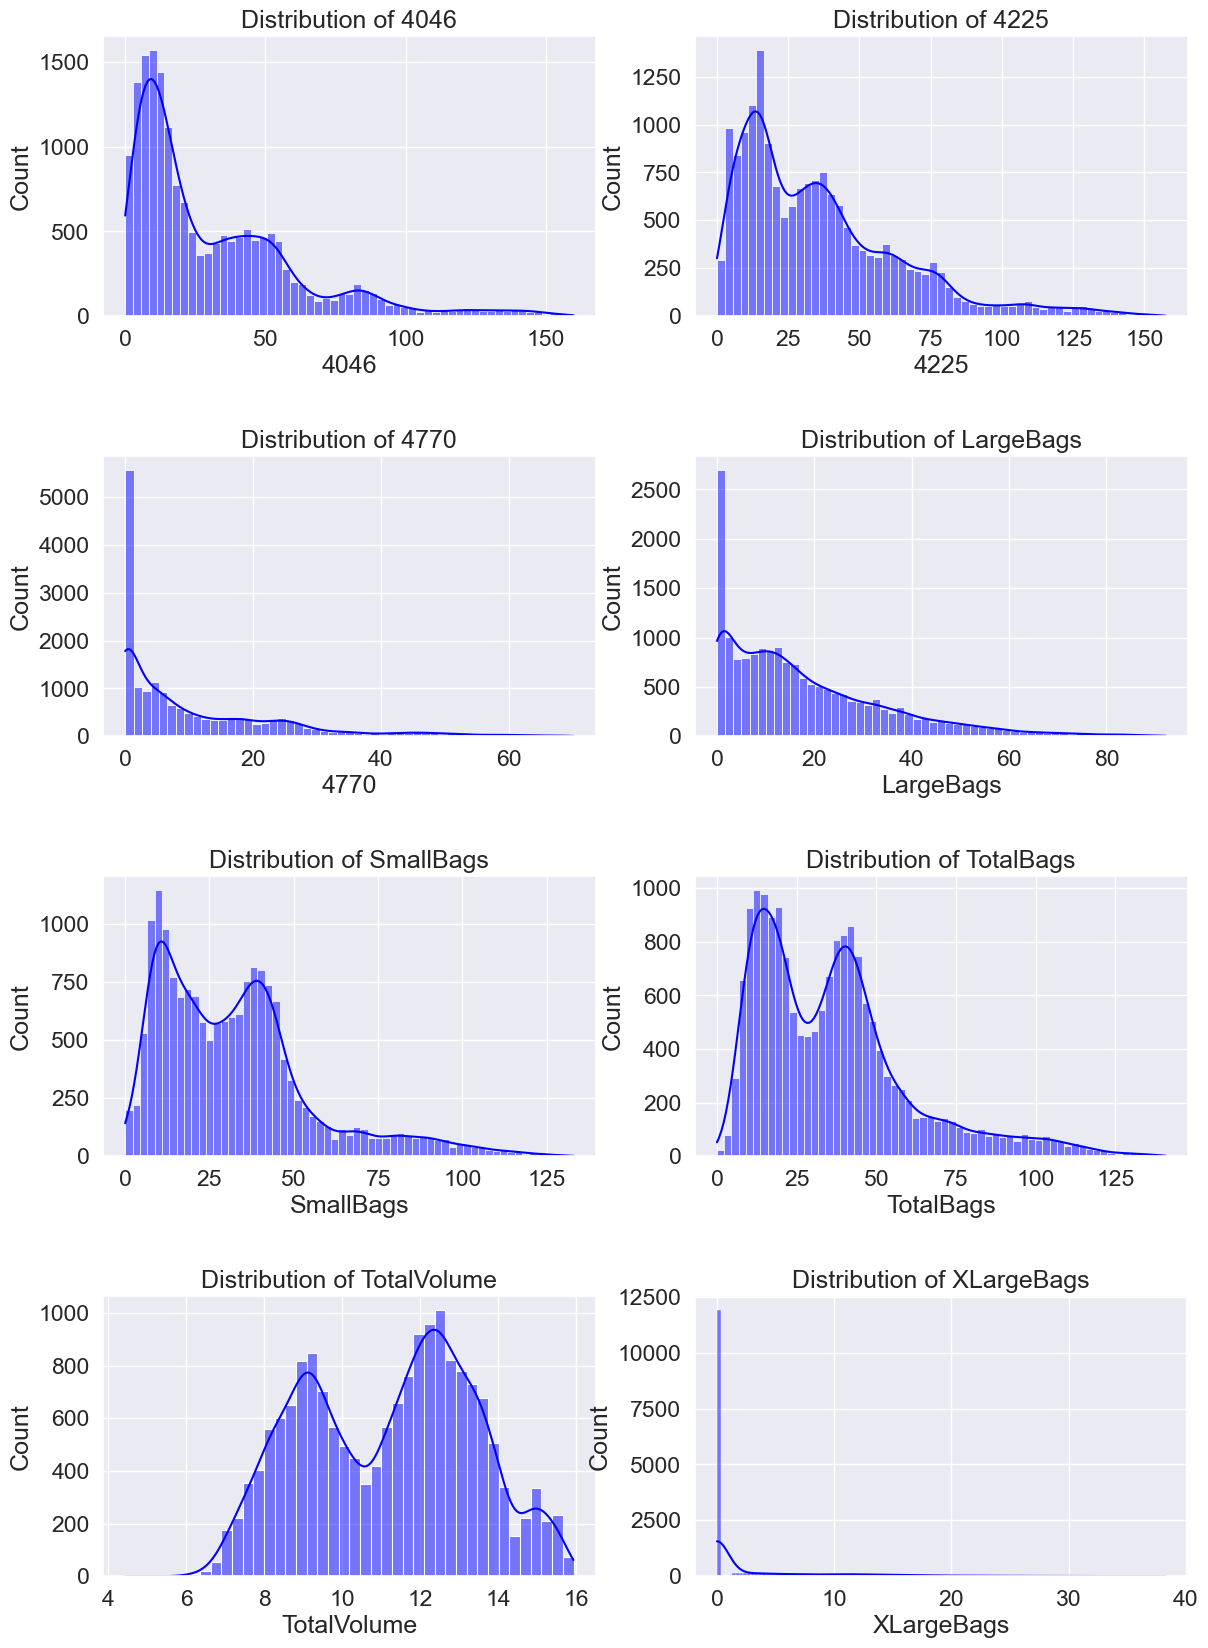

In [104]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(4, 2, figsize=(14, 20))
for ax, column in zip(axs.flat, skew_columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='blue')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [105]:
# Separating the independent and target variables into x and y 
col = 'AveragePrice'
x = df.drop(col, axis=1)
y = df[col]

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
display(x.head())
display(y.head())

Feature Dimension = (17651, 12)
Label Dimension = (17651,)


TotalVolume       4046       4225      4770  TotalBags  SmallBags  \
0    11.070329  10.120997  37.903460  3.638275  20.564634  20.490870   
1    10.912849   8.768933  35.473513  3.878204  21.183249  21.110581   
2    11.680304   9.262632  47.790416  5.072283  20.120399  20.035113   
3    11.277104  10.421946  41.597133  4.171309  17.978534  17.839520   
4    10.840357   9.800999  35.260208  4.231732  18.355039  18.157325   

   LargeBags  XLargeBags  type  year  month  region  
0   4.534711         0.0     1  2015     12     0.0  
1   4.602425         0.0     1  2015     12     0.0  
2   4.689671         0.0     1  2015     12     0.0  
3   5.114173         0.0     1  2015     12     0.0  
4   5.825433         0.0     1  2015     11     0.0

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [106]:
# Separating the independent and target variables into x and y 
col = 'region'
x2 = df.drop(col, axis=1)
y2 = df[col]

print(f"Feature Dimension = {x2.shape}")
print(f"Label Dimension = {y2.shape}")
display(x2.head())
display(y2.unique())

Feature Dimension = (17651, 12)
Label Dimension = (17651,)


AveragePrice  TotalVolume       4046       4225      4770  TotalBags  \
0          1.33    11.070329  10.120997  37.903460  3.638275  20.564634   
1          1.35    10.912849   8.768933  35.473513  3.878204  21.183249   
2          0.93    11.680304   9.262632  47.790416  5.072283  20.120399   
3          1.08    11.277104  10.421946  41.597133  4.171309  17.978534   
4          1.28    10.840357   9.800999  35.260208  4.231732  18.355039   

   SmallBags  LargeBags  XLargeBags  type  year  month  
0  20.490870   4.534711         0.0     1  2015     12  
1  21.110581   4.602425         0.0     1  2015     12  
2  20.035113   4.689671         0.0     1  2015     12  
3  17.839520   5.114173         0.0     1  2015     12  
4  18.157325   5.825433         0.0     1  2015     11

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 52.,
       53., 51.])

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} x features for regression model {'*'*30}")
display(x.head())



****************************** x features for regression model ******************************


TotalVolume      4046      4225      4770  TotalBags  SmallBags  LargeBags  \
0    -0.061926 -0.709648  0.059642 -0.533970  -0.648548  -0.517773  -0.796802   
1    -0.134262 -0.755064 -0.025495 -0.516157  -0.623078  -0.490834  -0.792817   
2     0.218259 -0.738480  0.406050 -0.427502  -0.666838  -0.537584  -0.787683   
3     0.033054 -0.699539  0.189057 -0.494395  -0.755024  -0.633026  -0.762704   
4    -0.167561 -0.720397 -0.032969 -0.489909  -0.739523  -0.619211  -0.720851   

   XLargeBags      type      year     month    region  
0    -0.51836 -1.019047 -1.210013  1.644612 -1.695495  
1    -0.51836 -1.019047 -1.210013  1.644612 -1.695495  
2    -0.51836 -1.019047 -1.210013  1.644612 -1.695495  
3    -0.51836 -1.019047 -1.210013  1.644612 -1.695495  
4    -0.51836 -1.019047 -1.210013  1.362113 -1.695495

In [108]:
scaler2 = StandardScaler()

# Scaling data 
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)

print(f"\n\n{'*'*30} x2 features for classification model {'*'*30}")
display(x2.head())



****************************** x2 features for classification model ******************************


AveragePrice  TotalVolume      4046      4225      4770  TotalBags  \
0     -0.195352    -0.061926 -0.709648  0.059642 -0.533970  -0.648548   
1     -0.143510    -0.134262 -0.755064 -0.025495 -0.516157  -0.623078   
2     -1.232207     0.218259 -0.738480  0.406050 -0.427502  -0.666838   
3     -0.843387     0.033054 -0.699539  0.189057 -0.494395  -0.755024   
4     -0.324959    -0.167561 -0.720397 -0.032969 -0.489909  -0.739523   

   SmallBags  LargeBags  XLargeBags      type      year     month  
0  -0.517773  -0.796802    -0.51836 -1.019047 -1.210013  1.644612  
1  -0.490834  -0.792817    -0.51836 -1.019047 -1.210013  1.644612  
2  -0.537584  -0.787683    -0.51836 -1.019047 -1.210013  1.644612  
3  -0.633026  -0.762704    -0.51836 -1.019047 -1.210013  1.644612  
4  -0.619211  -0.720851    -0.51836 -1.019047 -1.210013  1.362113

In [109]:
#Checking Variance Inflation Factor (VIF)

In [110]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
4     TotalBags  106.755537
5     SmallBags   65.324800
0   TotalVolume   11.674529
6     LargeBags    9.213078
2          4225    6.686233
1          4046    4.515508
3          4770    3.285584
8          type    3.259831
7    XLargeBags    2.065809
9          year    1.406437
11       region    1.090211
10        month    1.054894

#By checking VIF values we can find the features causing multicollinearity problem. Here we can find the features:

TotalBags
SmallBags
TotalVolume have VIF value greater than 10 which means they have high correlation with each other.
We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [111]:
# Reviewing the correlation between label and the features with multicollinearity
corr_df[(corr_df['Feature A'] == 'AveragePrice') & (corr_df['Feature B'].isin(['TotalVolume', 'year', 'TotalBags', '4225', 'SmallBags', '4046', 'type', 'LargeBags'])) ]

Feature A Feature B  Corr coef
69   AveragePrice      type   0.615845
87   AveragePrice      year   0.093197
138  AveragePrice      4225  -0.172928
155  AveragePrice      4046  -0.208317

In [112]:
# Saving a backup of x
x_backup = x.copy()

In [113]:
# Dropping the columns with multicollinearity
x = x.drop(['TotalBags'], axis=1) 

In [114]:
#We drop the columns 'TotalBags' to solve the multicollinearity problem.

In [115]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
0   TotalVolume   10.810069
4     SmallBags    7.237706
2          4225    6.682461
1          4046    4.487115
3          4770    3.285546
7          type    3.186573
5     LargeBags    2.217811
6    XLargeBags    2.015619
8          year    1.405613
10       region    1.089755
9         month    1.054886

In [116]:
# Count the frequencies of target
target_counts = y2.value_counts().to_frame()
target_counts

region
0.0      338
16.0     338
49.0     338
44.0     338
39.0     338
38.0     338
35.0     338
34.0     338
32.0     338
30.0     338
26.0     338
23.0     338
19.0     338
18.0     338
27.0     338
8.0      338
2.0      338
13.0     338
12.0     338
11.0     338
4.0      338
5.0      338
10.0     338
9.0      338
20.0     337
1.0      337
28.0     337
33.0     336
41.0     336
40.0     336
14.0     336
50.0     336
31.0     335
24.0     335
25.0     333
48.0     333
21.0     333
53.0     332
7.0      332
22.0     331
17.0     331
36.0     330
3.0      329
37.0     328
47.0     328
43.0     326
29.0     325
46.0     307
42.0     301
45.0     292
6.0      290
15.0     272
52.0     256
51.0     169

In [117]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [118]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x2, y2)

In [119]:
target_counts = y1.value_counts().to_frame()
target_counts

region
0.0      338
40.0     338
29.0     338
30.0     338
31.0     338
32.0     338
33.0     338
34.0     338
35.0     338
36.0     338
37.0     338
38.0     338
39.0     338
41.0     338
1.0      338
42.0     338
43.0     338
44.0     338
45.0     338
46.0     338
47.0     338
48.0     338
49.0     338
50.0     338
52.0     338
53.0     338
28.0     338
27.0     338
26.0     338
25.0     338
2.0      338
3.0      338
4.0      338
5.0      338
6.0      338
7.0      338
8.0      338
9.0      338
10.0     338
11.0     338
12.0     338
13.0     338
14.0     338
15.0     338
16.0     338
17.0     338
18.0     338
19.0     338
20.0     338
21.0     338
22.0     338
23.0     338
24.0     338
51.0     338

In [120]:
X = x1
Y = y1

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

In [122]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
#         print(f"{i}: acc = {acc}")
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [123]:
# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.5281 at random_state 106


In [124]:
#Metrics: Mean Square Error (MSE): measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (12355, 11)
x_test shape:   (5296, 11)
y_train shape:  (12355,)
y_test shape:   (5296,)


In [126]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [127]:
eval_model

Empty DataFrame
Columns: [id, Model, RMSE, R2_Score(test), CV_Mean]
Index: []

In [128]:
#Linear Regression

In [129]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

LR coef_        : [-0.1603621  -0.04470204  0.18324227 -0.02558821 -0.00593248 -0.0816512
  0.02274294  0.15621052  0.07146215  0.06793834  0.02153284]

LR intercept_ : 1.4052928413322796
LR score train  : 0.5011294998644142
LR score test   : 0.5280622894559526
********** E R R O R **********
Mean squared error: 0.0713
Root Mean squared error: 0.2670
Cross-validation results (R2): [-0.47011162  0.17397614  0.30080738  0.03509655  0.37060331 -0.09105942
  0.16315781  0.05608947  0.16219526  0.16517342]
Average R2: 0.0866
R2_Score(test): 0.5281


In [130]:
%%time
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

CPU times: total: 1.61 s
Wall time: 2min 29s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=106)

In [131]:
random_search.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=20)

In [132]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model = eval_model.append(model_scores, ignore_index=True)

Best parameters : {'n_estimators': 20, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 50, 'bootstrap': True}
Best score : 0.8490476705234558
Best Estimator:  RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=20)
********** E R R O R **********
Mean squared error: 0.0211
Root Mean squared error: 0.1454
Cross-validation results (R2): 0.8490476705234558
Average R2: 0.8490
R2_Score(test): 0.8600


In [133]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.0380
Root Mean squared error: 0.1949
Cross-validation results (R2): [-0.99479939  0.11519931  0.33208529 -0.367213   -0.31317269]
Average R2: -0.2456
R2_Score(test): 0.7485


In [134]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.0208
Root Mean squared error: 0.1442
Cross-validation results (R2): [-0.81031721  0.22908313  0.40090447 -0.12135417 -0.08549894]
Average R2: -0.0774
R2_Score(test): 0.8624


In [135]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.0388
Root Mean squared error: 0.1970
Cross-validation results (R2): [0.11524306 0.56579791 0.65094329 0.34455054 0.22931869]
Average R2: 0.3812
R2_Score(test): 0.7431
CPU times: total: 17 s
Wall time: 23.2 s


In [136]:
%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.1511
Root Mean squared error: 0.3887
Cross-validation results (R2): [-3.85189856 -0.63909317 -0.04763459 -0.44449249 -0.80022956]
Average R2: -1.1567
R2_Score(test): -0.0000
CPU times: total: 78.1 ms
Wall time: 87.4 ms


In [137]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.0713
Root Mean squared error: 0.2670
Cross-validation results (R2): [-0.32806876  0.23210892  0.41631162  0.08554302  0.15583104]
Average R2: 0.1123
R2_Score(test): 0.5281
CPU times: total: 93.8 ms
Wall time: 87.8 ms


In [138]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.0336
Root Mean squared error: 0.1833
Cross-validation results (R2): [-0.46007405  0.49265442  0.08706731  0.23823668  0.00227043]
Average R2: 0.0720
R2_Score(test): 0.7775
CPU times: total: 45.5 s
Wall time: 51.3 s


In [139]:
# Calculate the difference between R2 score and cross-validation score 
eval_model['Dif_R2_CVmean'] = eval_model['R2_Score(test)'] - eval_model['CV_Mean']

# Presenting the results ordered
eval_model.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

id  \
1      Random Forest Regressor   
4  Gradient Boosting Regressor   
6                        Ridge   
0             LinearRegression   
7                          SVR   
3        K Neighbors Regressor   
2      Decision Tree Regressor   
5                        Lasso   

                                               Model      RMSE  \
1  (DecisionTreeRegressor(max_depth=50, max_featu...  0.145423   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  0.196975   
6                                            Ridge()  0.266997   
0                                 LinearRegression()  0.266997   
7                                              SVR()  0.183344   
3                              KNeighborsRegressor()  0.144184   
2            DecisionTreeRegressor(random_state=106)  0.194923   
5                                            Lasso()  0.388655   

   R2_Score(test)   CV_Mean  Dif_R2_CVmean  
1    8.599975e-01  0.849048       0.010950  
4    7.431412e-01  0.381171       0.361970  
6    5.280638e-01  0.112345       0.415719  
0    5.280623e-01  0.086593       0.441469  
7    7.774627e-01  0.072031       0.705432  
3    8.623716e-01 -0.077437       0.939808  
2    7.484654e-01 -0.245580       0.994046  
5   -8.076125e-07 -1.156670       1.156669

In [140]:
#From the summary of models results and compare the cross-validation scores and R2 score, we conclude Random Forest Regressor is our best performing model.

#In order to apply Hyper Parameter tunning we are going to select Random Forest Regressor as our final model.

In [141]:
#Finding the best parameters for Linear Regression

In [142]:
random_state

106

In [143]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

CPU times: total: 10.7 s
Wall time: 2min 33s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=106, scoring='neg_mean_squared_error')

In [144]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 170,
 'min_samples_split': 3,
 'min_samples_leaf': 5,
 'max_depth': 90,
 'bootstrap': True}

In [145]:
best_model

RandomForestRegressor(max_depth=90, min_samples_leaf=5, min_samples_split=3,
                      n_estimators=170)

In [146]:
#Final Model

In [147]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=8, n_estimators=20)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 86.21%


In [148]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "avocado_regressor_model.pkl")

['avocado_regressor_model.pkl']

In [149]:
# Lets load the saved model and get the predictions
model = joblib.load("avocado_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Maximum R2 score: 86.207 %


0         1         2         3         4         5     \
Predicted  1.878951  1.202281  1.168256  1.149212  1.345418  1.152378   
Original   1.940000  1.270000  0.990000  1.200000  1.380000  1.190000   

               6         7         8        9     ...      5286      5287  \
Predicted  1.171167  1.404567  1.055347  1.06148  ...  1.402514  0.836032   
Original   1.170000  1.500000  0.880000  1.02000  ...  1.520000  0.650000   

               5288      5289      5290      5291      5292      5293  \
Predicted  1.437996  1.699874  2.251516  1.151751  1.204153  1.238246   
Original   1.530000  1.820000  2.060000  1.230000  1.490000  0.990000   

               5294      5295  
Predicted  1.178087  1.734269  
Original   1.460000  1.580000  

[2 rows x 5296 columns]

In [150]:
#These are the predicted values in a dataset to compared the prediction with the test data with R2 score 86.19%.

In [151]:
#Finding the best random state

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [177]:

# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

KeyboardInterrupt: 

In [154]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (12776, 12)
x_test shape:   (5476, 12)
y_train shape:  (12776,)
y_test shape:   (5476,)


In [155]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_val_score

In [156]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [157]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred_dict = {}
    

In [158]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[ 97   0   0 ...   0   0   0]
 [  0  84   0 ...   0   0   0]
 [  0   0  95 ...   0   0   0]
 ...
 [  0   0   0 ... 100   0   0]
 [  0   0   0 ...   0 126   0]
 [  0   1   1 ...   0   0  80]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       106
         1.0       0.85      0.91      0.88        92
         2.0       0.97      0.99      0.98        96
         3.0       0.92      0.86      0.89       111
         4.0       0.96      1.00      0.98       102
         5.0       0.91      0.79      0.85       101
         6.0       0.93      0.98      0.95        97
         7.0       0.94      0.91      0.92       106
         8.0       0.95      0.96      0.95        92
         9.0       0.91      0.90      0.90        87
        10.0       0.91      0.82      0.86       114
        11.0       0.94      0.97      0.95       119
        12.0       0.92      

In [160]:
%%time
id_model = 'ExtraTreesClassifier'
model = [id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred

AttributeError: 'list' object has no attribute 'fit'

In [161]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[ 55   0   0 ...   0   0   0]
 [  0  19   0 ...   0   0   0]
 [  0   0  71 ...   0   0   3]
 ...
 [  0   0   0 ...  96   4   0]
 [  0   0   0 ...   3 113   0]
 [  0   3   0 ...   0   0  28]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.51      0.52      0.52       106
         1.0       0.15      0.21      0.18        92
         2.0       0.71      0.74      0.72        96
         3.0       0.68      0.40      0.50       111
         4.0       0.55      0.52      0.53       102
         5.0       0.42      0.43      0.42       101
         6.0       0.85      0.91      0.88        97
         7.0       0.56      0.83      0.67       106
         8.0       0.71      0.84      0.77        92
         9.0       0.48      0.85      0.61        87
        10.0       0.73      0.36      0.48       114
        11.0       0.47      0.43      0.45       119
        12.0       0.47      0.63

In [207]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [162]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred

KeyboardInterrupt: 

In [163]:
%%time

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0 62 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 34]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       106
         1.0       0.00      0.00      0.00        92
         2.0       0.00      0.00      0.00        96
         3.0       0.00      0.00      0.00       111
         4.0       0.20      0.26      0.23       102
         5.0       0.00      0.00      0.00       101
         6.0       0.00      0.00      0.00        97
         7.0       0.00      0.00      0.00       106
         8.0       0.00      0.00      0.00        92
         9.0       0.00      0.00      0.00        87
        10.0       0.00      0.00      0.00       114
        11.0       0.22      0.02      0.03       119
        12.0       0.00      0.00      0.00       101
        13.0   

In [164]:
%%time

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[ 97   0   0 ...   0   0   0]
 [  0  81   0 ...   0   0   0]
 [  0   0  94 ...   0   0   0]
 ...
 [  0   0   0 ... 100   0   0]
 [  0   0   0 ...   0 126   0]
 [  0   1   3 ...   0   0  67]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       106
         1.0       0.72      0.88      0.79        92
         2.0       0.90      0.98      0.94        96
         3.0       0.86      0.87      0.87       111
         4.0       0.86      0.93      0.90       102
         5.0       0.84      0.78      0.81       101
         6.0       0.92      0.99      0.96        97
         7.0       0.85      0.88      0.86       106
         8.0       0.90      0.92      0.91        92
         9.0       0.86      0.92      0.89        87
        10.0       0.79      0.77      0.78       114
        11.0       0.89      0.91      0.90       119
        12.0       0.94      0.93 

In [165]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

id                                              Model  \
0  RandomForestClassifier  (DecisionTreeClassifier(max_features='sqrt', r...   
3       BaggingClassifier  (DecisionTreeClassifier(random_state=122513698...   
1      LogisticRegression                               LogisticRegression()   
2      AdaBoostClassifier  (DecisionTreeClassifier(max_depth=1, random_st...   

   Training Accuracy  Model Accuracy Score  
0           1.000000              0.912527  
3           0.994756              0.863769  
1           0.567392              0.544558  
2           0.054869              0.056976

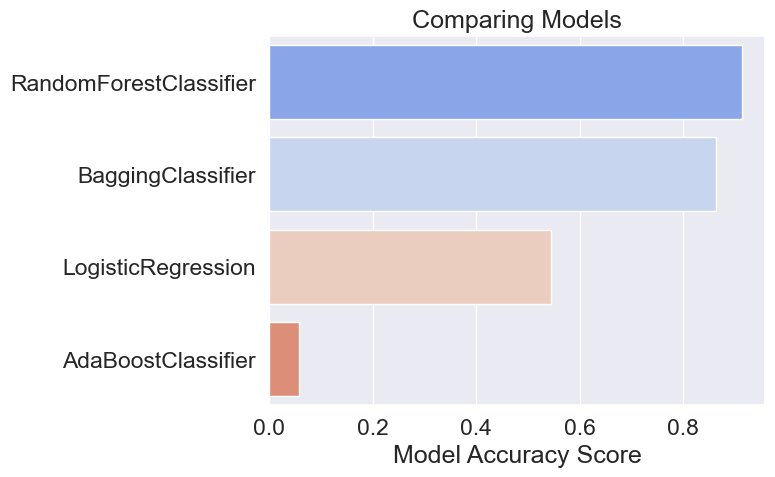

In [166]:
sns.barplot(y= 'id', x= 'Model Accuracy Score', data= df_model_accuracy, palette='coolwarm')
plt.title('Comparing Models')
plt.xlabel('Model Accuracy Score')
plt.ylabel('');


In [167]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [168]:
# Define the new columns for CV metrics
df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model_accuracy.set_index("id", inplace=True)

In [169]:
%%time
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred_dict[id_model])
    
    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff
    

KeyboardInterrupt: 

In [170]:
# Present the metrics to eval the best model
df_model_accuracy.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])

Model  \
id                                                                          
RandomForestClassifier  (DecisionTreeClassifier(max_features='sqrt', r...   
BaggingClassifier       (DecisionTreeClassifier(random_state=122513698...   
LogisticRegression                                   LogisticRegression()   
AdaBoostClassifier      (DecisionTreeClassifier(max_depth=1, random_st...   

                        Training Accuracy  Model Accuracy Score  \
id                                                                
RandomForestClassifier           1.000000              0.912527   
BaggingClassifier                0.994756              0.863769   
LogisticRegression               0.567392              0.544558   
AdaBoostClassifier               0.054869              0.056976   

                        CV score mean  Diff Acc and cv score  
id                                                            
RandomForestClassifier            NaN                    NaN  
BaggingClassifier                 NaN                    NaN  
LogisticRegression                NaN                    NaN  
AdaBoostClassifier                NaN                    NaN

In [171]:
#After applying cross-validation technique we observe the better cross-validation score is for ExtraTreesClassifier and the difference with accuracy score is 0.213340 confirming as follows:

#ExtraTreesClassifier is our best Model

In [172]:
random_state

106

In [173]:
model = ExtraTreesClassifier()
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'random_state': [random_state, 10, 50, 1000],
             'max_depth':[0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

# Build the model 
model = ExtraTreesClassifier()

In [178]:


# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

MemoryError: Unable to allocate 958. KiB for an array with shape (12, 10221) and data type float64

In [179]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for ExtraTreesClassifier model:")
best_params

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [180]:
best_model

RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=20)

In [181]:
# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'entropy', max_depth = 20, n_estimators = 300, n_jobs = -2, random_state = 10)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

MemoryError: could not allocate 7077888 bytes

In [182]:
from sklearn.multiclass import OneVsRestClassifier
# Create the classifier
classifier = OneVsRestClassifier(best_model)

# Train the model
classifier.fit(x_train, y_train)

# Get the decision function scores for each class
y_score = classifier.predict_proba(x_test)

exception calling callback for <Future at 0x251c88f8f90 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\__init__.py", line 82, in <module>
    import scipy.linalg  # noqa
    ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\linalg\__init__.py", line 197, in <module>
    from ._misc import *
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\linalg\_misc.py", line 4, in <module>
    from .lapack import get_lapack_func

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [183]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(category_mappings['region'])):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 6))
# one color for each category
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
          '#bcbd22', '#17becf', '#1a9850', '#66c2a5', '#a6d854', '#6a3d9a', '#b15928', '#f0027f', 
          '#7f3b08', '#386cb0', '#8dd3c7', '#d9d9d9', '#e31a1c', '#fb9a99', '#fdae61', '#ffffbf', 
          '#2ca02c', '#e377c2', '#17becf', '#9467bd', '#d62728', '#bcbd22', '#7f7f7f', '#1f77b4', 
          '#ff7f0e', '#2ca02c', '#1a9850', '#d62728', '#a6d854', '#8dd3c7', '#e377c2', '#7f7f7f', 
          '#bcbd22', '#17becf', '#1a9850', '#66c2a5', '#a6d854', '#e377c2', '#7f7f7f']

# Plot a roc curve for each category
for i, color in zip(range(len(category_mappings['region'])), colors):
    print()
    plt.plot(fpr[i], tpr[i], color=color, lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Best Model')
plt.show()

NameError: name 'y_score' is not defined

In [184]:
# List of the Area Under the Curve of each region
for i, reg in enumerate(category_mappings['region']):
    print(f"ROC curve (area = {roc_auc[i]:0.2f}) for class {reg}")

KeyError: 0

In [185]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "avocado_classifier_model.pkl")

['avocado_classifier_model.pkl']

In [186]:
# Lets load the saved model and get the predictions
model = joblib.load("avocado_classifier_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

IndexError: list index out of range